In [ ]:
from google.colab import files
uploaded = files.upload()

Saving database.rar to database.rar


In [ ]:
!apt-get install -y unrar > /dev/null
!unrar x -y database.rar


UNRAR 6.11 beta 1 freeware      Copyright (c) 1993-2022 Alexander Roshal


Extracting from database.rar

Creating    database                                                  OK
Extracting  database/108-1.txt.jpg                                         0%  OK 
Extracting  database/137-1.txt.jpg                                         0%  OK 
Extracting  database/145-1.txt.jpg                                         0%  OK 
Extracting  database/172-1.txt.jpg                                         0%  OK 
Extracting  database/198-1.txt.jpg                                         0%  OK 
Extracting  database/241-11.txt.jpg                                        0%  OK 
Extracting  database/245-1.txt.jpg                                         0%  OK 
Extracting  database/251-1.txt.jpg                                         0%  OK 
Extracting  database/257-1.txt.jpg                                         0%

In [ ]:
import os

base_dir = "/content/database"
all_files = os.listdir(base_dir)
print("📂 Total files extracted:", len(all_files))

# Show a few sample names
print("🖼️ First 10 files:", all_files[:10])


📂 Total files extracted: 1000
🖼️ First 10 files: ['RTFRON_V43_14-11-2012_11.txt.jpg', 'TFRON_V251_8-9-2014_13.jpg', 'TFRON_V224_19-11-2013_1.jpg', 'TFRON_V286_19-3-2015_19.jpg', 'TFRON_V170_8-4-2013_17.jpg', 'R251-19.txt.jpg', 'TFRON_V226_19-11-2013_14.jpg', 'RTFRON_V43_14-11-2012_9.txt.jpg', 'RTFRON_V72_21-11-2012_3.txt.jpg', 'RTFRON_V41_12-11-2012_4.txt.jpg']


In [ ]:
import cv2
import numpy as np

image_paths = [
    os.path.join(base_dir, f)
    for f in all_files
    if f.lower().endswith(('.jpg', '.jpeg', '.png'))
]

print("✅ Total images found:", len(image_paths))

data = []
for idx, path in enumerate(image_paths):
    try:
        img = cv2.imread(path)
        if img is None:
            print(f"⚠️ Skipping unreadable image: {path}")
            continue

        # Resize and normalize
        img = cv2.resize(img, (224, 224), interpolation=cv2.INTER_CUBIC)
        img = img.astype("float32") / 255.0

        data.append(img)
    except Exception as e:
        print(f"⚠️ Error reading {path}: {e}")
        continue

image_data = np.array(data)
print("✅ image_data shape:", image_data.shape)
print("^_^- Image dataset ready -^_^")


✅ Total images found: 1000
✅ image_data shape: (1000, 224, 224, 3)
^_^- Image dataset ready -^_^


In [ ]:
# ✅ Skip wget — you already uploaded database.rar manually to Colab.
# ✅ Also skip rarfile — we used unrar already.

# System setup
!apt-get install -y unrar > /dev/null
!unrar x -y database.rar > /dev/null

# Python imports
import os
import glob
import numpy as np
import cv2
import pickle
import tensorflow as tf
import re
import datetime
import matplotlib.pyplot as plt

# TensorFlow & Keras
from tensorflow.keras.layers import (
    Input, Conv2D, BatchNormalization, Activation, Subtract, LeakyReLU, Add,
    Average, Lambda, MaxPool2D, Dropout, UpSampling2D, Concatenate, Multiply,
    GlobalAveragePooling2D, Dense, ZeroPadding2D, AveragePooling2D,
    Flatten, ConvLSTM2D, MaxPooling2D, ReLU, Conv2DTranspose
)
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.callbacks import CSVLogger, ModelCheckpoint, LearningRateScheduler
from tensorflow.keras.optimizers import Adam
import tensorflow.keras.backend as K

# Machine learning utilities
from sklearn.svm import LinearSVC
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Image processing
from skimage.feature import hog, local_binary_pattern
from skimage import exposure, feature
from skimage.transform import radon, rescale
from skimage.filters import roberts, sobel, scharr, prewitt

print("✅ Environment setup complete!")
print("📂 Extracted files inside /content/database:")
print(len(os.listdir('/content/database')), "files found.")
print("Example files:", os.listdir('/content/database')[:10])


✅ Environment setup complete!
📂 Extracted files inside /content/database:
1000 files found.
Example files: ['RTFRON_V43_14-11-2012_11.txt.jpg', 'TFRON_V251_8-9-2014_13.jpg', 'TFRON_V224_19-11-2013_1.jpg', 'TFRON_V286_19-3-2015_19.jpg', 'TFRON_V170_8-4-2013_17.jpg', 'R251-19.txt.jpg', 'TFRON_V226_19-11-2013_14.jpg', 'RTFRON_V43_14-11-2012_9.txt.jpg', 'RTFRON_V72_21-11-2012_3.txt.jpg', 'RTFRON_V41_12-11-2012_4.txt.jpg']


In [ ]:
import os, glob

# Directory containing all extracted images
base_dir = "/content/database"

# Get all JPG files
all_images = sorted(glob.glob(os.path.join(base_dir, "*.jpg")))

print(f"📸 Total images found: {len(all_images)}")

# Separate affected vs healthy based on filename prefix
affected_files = [f for f in all_images if os.path.basename(f).startswith(("R", "RTFRON_"))]
healthy_files = [f for f in all_images if os.path.basename(f).startswith("TFRON_")]

print(f"❤️ Affected samples: {len(affected_files)}")
print(f"💚 Healthy samples:  {len(healthy_files)}")

# Example preview
print("\nExample affected:", affected_files[:5])
print("Example healthy:", healthy_files[:5])

# Combine into labeled lists (filename, label)
# Label 1 = affected, 0 = healthy
l_train = [(f, 1) for f in affected_files] + [(f, 0) for f in healthy_files]

print(f"\n✅ Total labeled pairs: {len(l_train)}")


📸 Total images found: 1000
❤️ Affected samples: 627
💚 Healthy samples:  236

Example affected: ['/content/database/R108-10.txt.jpg', '/content/database/R108-11.txt.jpg', '/content/database/R108-12.txt.jpg', '/content/database/R108-13.txt.jpg', '/content/database/R108-14.txt.jpg']
Example healthy: ['/content/database/TFRON_V170_8-4-2013_0.jpg', '/content/database/TFRON_V170_8-4-2013_1.jpg', '/content/database/TFRON_V170_8-4-2013_10.jpg', '/content/database/TFRON_V170_8-4-2013_11.jpg', '/content/database/TFRON_V170_8-4-2013_12.jpg']

✅ Total labeled pairs: 863


In [ ]:
string = [650,700]
affected_files_text2 = []
for f in string:
    list1 = []
    normal_dir = "../input/thermal-images-for-breast-cancer-diagnosis-dmrir/Imagens e Matrizes da Tese de Thiago Alves Elias da Silva/Desenvolvimento da Metodologia/DOENTES/{}/Segmentadas".format(f)
    normal_dir_text = "../input/thermal-images-for-breast-cancer-diagnosis-dmrir/Imagens e Matrizes da Tese de Thiago Alves Elias da Silva/Desenvolvimento da Metodologia/DOENTES/{}/Matrizes".format(f)
    dir1 = os.path.join(normal_dir,"*.png")
    normal_files = glob.glob(dir1)
    dir2 = os.path.join(normal_dir_text,"*.txt")
    normal_files_text = glob.glob(dir2)

    try:
        for i in range(len(normal_files)):
            list1.append(normal_files[i]+"|"+normal_files_text[i])
    except:
        print(f)

    affected_files_text2.extend(list1)

string2 = [950]

healthy_files_text2 = []
for f in string2:
    list2 = []
    normal_dir = "../input/thermal-images-for-breast-cancer-diagnosis-dmrir/Imagens e Matrizes da Tese de Thiago Alves Elias da Silva/Desenvolvimento da Metodologia/SAUDA╠üVEIS/{}/Segmentadas".format(f)
    normal_dir_text = "../input/thermal-images-for-breast-cancer-diagnosis-dmrir/Imagens e Matrizes da Tese de Thiago Alves Elias da Silva/Desenvolvimento da Metodologia/SAUDA╠üVEIS/{}/Matrizes".format(f)
    dir1 = os.path.join(normal_dir,"*.png")
    normal_files = glob.glob(dir1)
    dir2 = os.path.join(normal_dir_text,"*.txt")
    normal_files_text = glob.glob(dir2)
    #print(len(normal_files),f)
    try:
        for i in range(len(normal_files)):
            list2.append(normal_files[i]+"|"+normal_files_text[i])
    except:
        print(f)

    healthy_files_text2.extend(list2)


In [ ]:
import os, shutil, random

base_dir = "/content/database"
affected_dir = os.path.join(base_dir, "affected")
healthy_dir = os.path.join(base_dir, "healthy")

os.makedirs(affected_dir, exist_ok=True)
os.makedirs(healthy_dir, exist_ok=True)

# Example: if filenames contain 'R' for affected and 'T' for healthy
for f in os.listdir(base_dir):
    if f.lower().endswith((".jpg", ".png", ".jpeg")):
        src = os.path.join(base_dir, f)
        if f.startswith("R"):  # example pattern
            shutil.move(src, os.path.join(affected_dir, f))
        elif f.startswith("T"):
            shutil.move(src, os.path.join(healthy_dir, f))

print(f"✅ Files moved to folders:\n{len(os.listdir(affected_dir))} affected, {len(os.listdir(healthy_dir))} healthy")


✅ Files moved to folders:
627 affected, 236 healthy


In [ ]:
from sklearn.model_selection import train_test_split

data_dir = "/content/database"
train_dir = os.path.join(data_dir, "train")
val_dir = os.path.join(data_dir, "val")

os.makedirs(train_dir + "/affected", exist_ok=True)
os.makedirs(train_dir + "/healthy", exist_ok=True)
os.makedirs(val_dir + "/affected", exist_ok=True)
os.makedirs(val_dir + "/healthy", exist_ok=True)

def split_data(source, train_dest, val_dest, split_ratio=0.8):
    files = os.listdir(source)
    train_files, val_files = train_test_split(files, train_size=split_ratio, random_state=42)
    for f in train_files:
        shutil.copy(os.path.join(source, f), os.path.join(train_dest, f))
    for f in val_files:
        shutil.copy(os.path.join(source, f), os.path.join(val_dest, f))

split_data(f"{data_dir}/affected", f"{train_dir}/affected", f"{val_dir}/affected")
split_data(f"{data_dir}/healthy", f"{train_dir}/healthy", f"{val_dir}/healthy")

print("✅ Train/validation data prepared.")


✅ Train/validation data prepared.


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import os

# Directories
train_dir = "/content/database/train"
val_dir = "/content/database/val"

# -------------------------------------------
# 1️⃣ Data Augmentation & Normalization
# -------------------------------------------
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
)

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=16,
    class_mode='binary'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=16,
    class_mode='binary'
)

# -------------------------------------------
# 2️⃣ Load DenseNet121 as Feature Extractor
# -------------------------------------------
base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze convolutional base
for layer in base_model.layers:
    layer.trainable = False

# -------------------------------------------
# 3️⃣ Add Custom Classifier
# -------------------------------------------
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(1, activation='sigmoid')(x)

model = Model(inputs=base_model.input, outputs=predictions)

# -------------------------------------------
# 4️⃣ Compile Model
# -------------------------------------------
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# -------------------------------------------
# 5️⃣ Train Model
# -------------------------------------------
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10,
    verbose=1
)

# -------------------------------------------
# 6️⃣ Save Model
# -------------------------------------------
model.save("/content/densenet_breast_cancer_model.h5")
print("💾 Model saved as 'densenet_breast_cancer_model.h5'")


Found 689 images belonging to 2 classes.
Found 174 images belonging to 2 classes.
29084464/29084464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 166s 3s/step - accuracy: 0.6961 - loss: 0.6122 - val_accuracy: 0.9885 - val_loss: 0.2587
Epoch 2/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 196s 3s/step - accuracy: 0.8498 - loss: 0.3535 - val_accuracy: 1.0000 - val_loss: 0.1488
Epoch 3/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 146s 3s/step - accuracy: 0.9215 - loss: 0.2169 - val_accuracy: 1.0000 - val_loss: 0.0865
Epoch 4/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 160s 4s/step - accuracy: 0.9225 - loss: 0.1812 - val_accuracy: 1.0000 - val_loss: 0.0664
Epoch 5/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 146s 3s/step - accuracy: 0.9459 - loss: 0.1574 - val_accuracy: 0.9885 - val_loss: 0.0688
Epoch 6/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 146s 3s/step - accuracy: 0.9436 - loss: 0.1289 - val_accuracy: 1.0000 - val_loss: 0.0424
Epoch 7/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 146s 3s/step - accuracy: 0.9650 - loss: 0.1105 - val_accuracy: 1.0000 - val_loss: 0.0349
Epoch 8/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 146s 3s/step - accuracy: 0.9663 - loss: 0.1072 - val_accuracy: 1.0000 - v

💾 Model saved as 'densenet_breast_cancer_model.h5'


📸 Total images found: 137


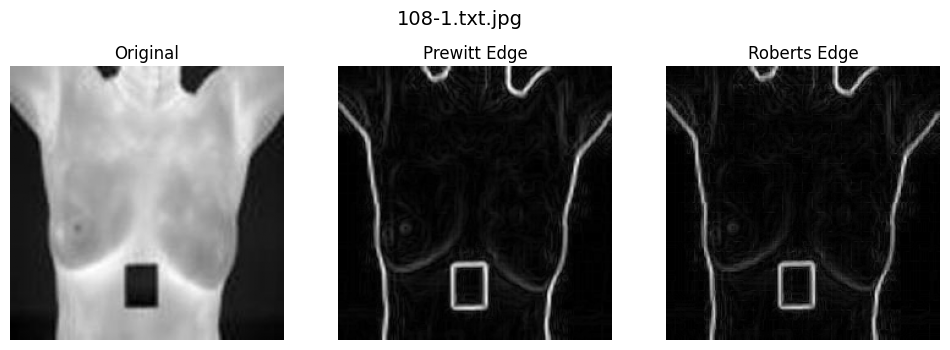

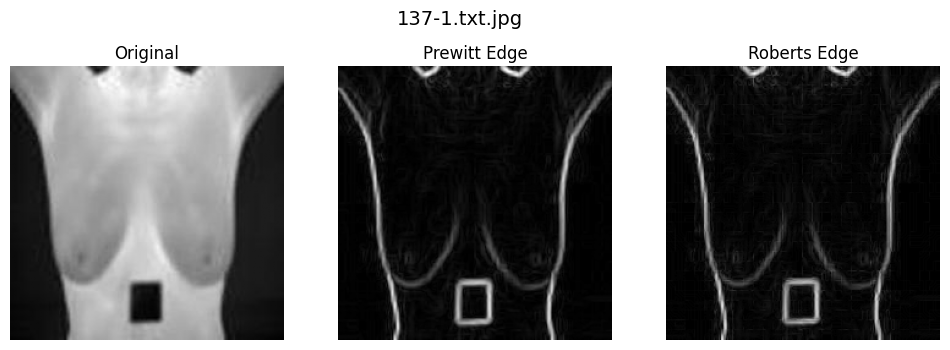

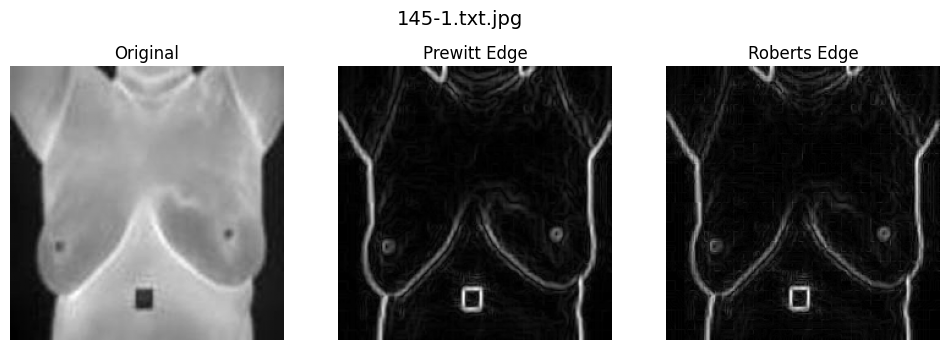

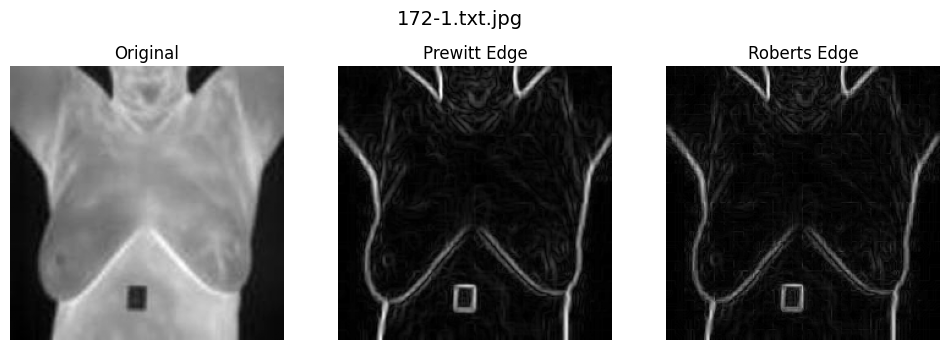

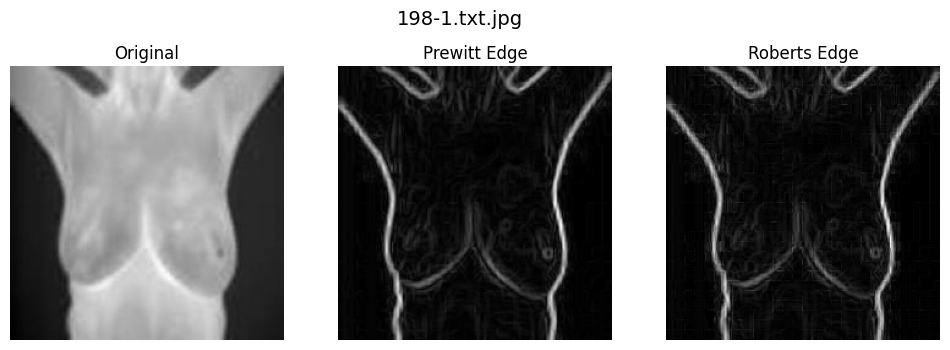

In [ ]:
import os
import glob
import cv2
import matplotlib.pyplot as plt
from skimage.filters import roberts, prewitt
from skimage import io, color

# -------------------------------
# 1️⃣ Set dataset directory
# -------------------------------
base_dir = "/content/database"

# Get all image files
image_files = sorted(glob.glob(os.path.join(base_dir, "*.*")))
image_files = [f for f in image_files if f.lower().endswith((".jpg", ".jpeg", ".png"))]

print(f"📸 Total images found: {len(image_files)}")

# -------------------------------
# 2️⃣ Edge detection function
# -------------------------------
def compute_edges(image_path):
    # Read image
    img = io.imread(image_path)
    if img.ndim == 3:
        img_gray = color.rgb2gray(img)
    else:
        img_gray = img

    # Compute edge maps
    prewitt_edges = prewitt(img_gray)
    roberts_edges = roberts(img_gray)

    return img_gray, prewitt_edges, roberts_edges

# -------------------------------
# 3️⃣ Visualize first N images
# -------------------------------
N = 5  # number of images to visualize

for i, img_path in enumerate(image_files[:N]):
    original, prewitt_map, roberts_map = compute_edges(img_path)

    plt.figure(figsize=(12,4))
    plt.suptitle(os.path.basename(img_path), fontsize=14)

    plt.subplot(1,3,1)
    plt.imshow(original, cmap='gray')
    plt.title('Original')
    plt.axis('off')

    plt.subplot(1,3,2)
    plt.imshow(prewitt_map, cmap='gray')
    plt.title('Prewitt Edge')
    plt.axis('off')

    plt.subplot(1,3,3)
    plt.imshow(roberts_map, cmap='gray')
    plt.title('Roberts Edge')
    plt.axis('off')

    plt.show()


In [ ]:
import os
import glob
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.filters import prewitt, roberts
from skimage import color, io

import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
base_dir = "/content/database"
image_files = sorted(glob.glob(os.path.join(base_dir, "*.*")))
image_files = [f for f in image_files if f.lower().endswith((".jpg", ".jpeg", ".png"))]

In [ ]:
def construct_3channel(img_path, target_size=(224,224)):
    img = io.imread(img_path)
    if img.ndim == 3:
        img_gray = color.rgb2gray(img)
    else:
        img_gray = img

    img_gray = cv2.resize(img_gray, target_size)
    img_gray = img_gray.astype(np.float32) / 255.0

    prewitt_map = prewitt(img_gray)
    roberts_map = roberts(img_gray)

    # Stack as 3 channels
    img_3ch = np.stack([img_gray, prewitt_map, roberts_map], axis=-1)
    return img_3ch

In [ ]:
labels = []
data = []

for img_path in image_files:
    filename = os.path.basename(img_path)
    if filename.startswith(("R", "RTFRON_")):
        label = 1
    elif filename.startswith("TFRON_"):
        label = 0
    else:
        continue

    img_3ch = construct_3channel(img_path)
    data.append(img_3ch)
    labels.append(label)

X = np.array(data)
y = np.array(labels)

print(f"✅ Dataset ready: {X.shape}, Labels: {y.shape}")


✅ Dataset ready: (0,), Labels: (0,)


In [ ]:
import glob
import os

base_dir = "/content/database"

# Recursively find images in all subfolders
image_files = glob.glob(os.path.join(base_dir, "**", "*.*"), recursive=True)
image_files = [f for f in image_files if f.lower().endswith((".jpg", ".jpeg", ".png"))]

print(f"📸 Total images found: {len(image_files)}")

# Check filename prefixes
for f in image_files[:10]:
    print(os.path.basename(f))


📸 Total images found: 1863
IR_2015-04-24_0167.jpg
IR_2015-04-24_0053.jpg
IR_2015-05-22_0105.jpg
IR_2015-04-17_0036.jpg
IR_2015-04-17_0049.jpg
IR_2015-04-17_0037.jpg
IR_2015-04-17_0053.jpg
IR_2015-05-22_0098.jpg
IR_2015-04-24_0066.jpg
IR_2015-04-24_0068.jpg


In [ ]:
data = []
labels = []

for img_path in image_files:
    filename = os.path.basename(img_path)

    if filename.startswith(("R", "RTFRON_")):
        label = 1
    elif filename.startswith("TFRON_"):
        label = 0
    else:
        print("⚠️ Skipping unmatched file:", filename)
        continue

    # Construct 3-channel image here (as before)
    img_3ch = construct_3channel(img_path)
    data.append(img_3ch)
    labels.append(label)

X = np.array(data)
y = np.array(labels)
print(f"✅ Dataset shape: {X.shape}, Labels: {y.shape}")


⚠️ Skipping unmatched file: IR_2015-04-24_0167.jpg
⚠️ Skipping unmatched file: IR_2015-04-24_0053.jpg
⚠️ Skipping unmatched file: IR_2015-05-22_0105.jpg
⚠️ Skipping unmatched file: IR_2015-04-17_0036.jpg
⚠️ Skipping unmatched file: IR_2015-04-17_0049.jpg
⚠️ Skipping unmatched file: IR_2015-04-17_0037.jpg
⚠️ Skipping unmatched file: IR_2015-04-17_0053.jpg
⚠️ Skipping unmatched file: IR_2015-05-22_0098.jpg
⚠️ Skipping unmatched file: IR_2015-04-24_0066.jpg
⚠️ Skipping unmatched file: IR_2015-04-24_0068.jpg
⚠️ Skipping unmatched file: 145-1.txt.jpg
⚠️ Skipping unmatched file: IR_2015-04-17_0043.jpg
⚠️ Skipping unmatched file: IR_2015-04-17_0018.jpg
⚠️ Skipping unmatched file: IR_2015-05-22_0063.jpg
⚠️ Skipping unmatched file: IR_2015-04-17_0009.jpg
⚠️ Skipping unmatched file: IR_2015-05-22_0074.jpg
⚠️ Skipping unmatched file: IR_2015-05-22_0112.jpg
⚠️ Skipping unmatched file: 9-1.txt.jpg
⚠️ Skipping unmatched file: IR_2015-04-17_0022.jpg
⚠️ Skipping unmatched file: IR_2015-05-22_0110.jpg


In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [ ]:
# -------------------------------
# 5️⃣ Ablation study parameters
# -------------------------------
learning_rates = [1e-3, 1e-4]         # Example: two learning rates
fc_nodes = [256, 512]                 # Number of nodes in FC layer

results = []


In [ ]:
# -------------------------------
# 6️⃣ Loop over learning rates and FC nodes
# -------------------------------
for lr in learning_rates:
    for nodes in fc_nodes:
        print(f"\n🔹 Training with learning_rate={lr}, FC nodes={nodes}")

        # DenseNet121 as feature extractor
        base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(224,224,3))
        for layer in base_model.layers:
            layer.trainable = False

        x = base_model.output
        x = GlobalAveragePooling2D()(x)
        x = Dense(nodes, activation='relu')(x)
        x = Dropout(0.5)(x)
        preds = Dense(1, activation='sigmoid')(x)

        model = Model(inputs=base_model.input, outputs=preds)
        model.compile(optimizer=Adam(learning_rate=lr),
                      loss='binary_crossentropy',
                      metrics=['accuracy'])

        # Train
        history = model.fit(
            X_train, y_train,
            validation_data=(X_val, y_val),
            epochs=5,      # Use 5-10 epochs for quick ablation study
            batch_size=16,
            verbose=1
        )

        # Evaluate
        val_acc = history.history['val_accuracy'][-1]
        train_acc = history.history['accuracy'][-1]
        print(f"✅ Done: Train Acc={train_acc:.4f}, Val Acc={val_acc:.4f}")

        results.append({
            'learning_rate': lr,
            'fc_nodes': nodes,
            'train_acc': train_acc,
            'val_acc': val_acc
        })



🔹 Training with learning_rate=0.001, FC nodes=256
Epoch 1/5
87/87 ━━━━━━━━━━━━━━━━━━━━ 323s 3s/step - accuracy: 0.7035 - loss: 0.6246 - val_accuracy: 0.7254 - val_loss: 0.5873
Epoch 2/5
87/87 ━━━━━━━━━━━━━━━━━━━━ 305s 3s/step - accuracy: 0.7228 - loss: 0.6096 - val_accuracy: 0.7254 - val_loss: 0.5922
Epoch 3/5
87/87 ━━━━━━━━━━━━━━━━━━━━ 350s 4s/step - accuracy: 0.7237 - loss: 0.6103 - val_accuracy: 0.7254 - val_loss: 0.5926
Epoch 4/5
87/87 ━━━━━━━━━━━━━━━━━━━━ 311s 4s/step - accuracy: 0.7237 - loss: 0.6065 - val_accuracy: 0.7254 - val_loss: 0.5904
Epoch 5/5
87/87 ━━━━━━━━━━━━━━━━━━━━ 279s 3s/step - accuracy: 0.7237 - loss: 0.6026 - val_accuracy: 0.7254 - val_loss: 0.5896
✅ Done: Train Acc=0.7268, Val Acc=0.7254

🔹 Training with learning_rate=0.001, FC nodes=512
Epoch 1/5
87/87 ━━━━━━━━━━━━━━━━━━━━ 296s 3s/step - accuracy: 0.6927 - loss: 0.6348 - val_accuracy: 0.7254 - val_loss: 0.5910
Epoch 2/5
87/87 ━━━━━━━━━━━━━━━━━━━━ 303s 3s/step - accuracy: 0.7173 - loss: 0.6083 - val_accuracy: 0

In [ ]:
# -------------------------------
# 7️⃣ Summarize results
# -------------------------------
import pandas as pd
results_df = pd.DataFrame(results)
print("\n📊 Ablation Study Results:")
print(results_df)


📊 Ablation Study Results:
   learning_rate  fc_nodes  train_acc   val_acc
0         0.0010       256   0.726812  0.725434
1         0.0010       512   0.726812  0.725434
2         0.0001       256   0.726087  0.725434
3         0.0001       512   0.726087  0.725434


In [ ]:
import os
import glob
import numpy as np
import cv2
from skimage.filters import prewitt, roberts, sobel_h, sobel_v
from skimage import color, io
import tensorflow as tf
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
import pandas as pd

In [ ]:
base_dir = "/content/database"
image_files = glob.glob(os.path.join(base_dir, "**", "*.*"), recursive=True)
image_files = [f for f in image_files if f.lower().endswith((".jpg", ".jpeg", ".png"))]

labels = []
for f in image_files:
    fname = os.path.basename(f)
    if fname.startswith(("R", "RTFRON_")):
        labels.append(1)
    elif fname.startswith("TFRON_"):
        labels.append(0)
    else:
        labels.append(None)

image_files, labels = zip(*[(f,l) for f,l in zip(image_files, labels) if l is not None])
labels = np.array(labels)


In [ ]:
def technique_A(path, size=(224,224)):
    img = io.imread(path)
    img_gray = color.rgb2gray(img) if img.ndim==3 else img
    img_gray = cv2.resize(img_gray, size)/255.0
    prewitt_map = prewitt(img_gray)
    roberts_map = roberts(img_gray)
    return np.stack([img_gray, prewitt_map, roberts_map], axis=-1)

def technique_B(path, size=(224,224)):
    img = io.imread(path)
    img_gray = color.rgb2gray(img) if img.ndim==3 else img
    img_gray = cv2.resize(img_gray, size)/255.0
    sx = sobel_h(img_gray)
    sy = sobel_v(img_gray)
    return np.stack([img_gray, sx, sy], axis=-1)

def technique_C(path, size=(224,224)):
    img = io.imread(path)
    img_gray = color.rgb2gray(img) if img.ndim==3 else img
    img_gray = cv2.resize(img_gray, size)/255.0
    prewitt_map = prewitt(img_gray)
    sobel_map = sobel_h(img_gray)
    return np.stack([img_gray, prewitt_map, sobel_map], axis=-1)

techniques = {'A': technique_A, 'B': technique_B, 'C': technique_C}


In [ ]:
results = []

for name, func in techniques.items():
    print(f"\n🔹 Processing Technique {name}")
    # ... rest of the loop ...



🔹 Processing Technique A

🔹 Processing Technique B

🔹 Processing Technique C


In [ ]:
!pip install -q scikit-image

In [ ]:
import os, glob, random, math, itertools
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.applications import (DenseNet121, ResNet50, InceptionV3, EfficientNetB0)
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from skimage.filters import prewitt, roberts
from skimage.color import rgb2gray
import cv2
from tqdm import tqdm

In [ ]:
BASE_DIR = "/content/database"   # your extracted images folder
IMG_SIZE = (224, 224)
BATCH_SIZE = 16
EPOCHS = 6          # reduce for quick experiments, increase for full runs
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
tf.random.set_seed(RANDOM_SEED)

In [ ]:
# ---------------------------- Labeling rule --------------------------------
# Adjust this function if your naming pattern differs.
# Returns 1 for affected (positive), 0 for healthy (negative).
def label_fn(filename):
    base = os.path.basename(filename)
    # Example heuristics used earlier: filenames starting with 'R' => affected, 'T' => healthy
    if base.startswith("R") or base.startswith("RTFRON"):
        return 1
    elif base.startswith("T") or base.startswith("TFRON"):
        return 0
    # fallback: try to find 'healthy' or 'doente' words in path
    low = filename.lower()
    if "doentes" in low or "doente" in low:
        return 1
    if "saud" in low or "healthy" in low:
        return 0
    # if unsure, default 0
    return 0

In [ ]:
# ----------------------- Image pre-processing functions --------------------
def load_image_rgb(path, target_size=IMG_SIZE):
    img = cv2.imread(path)
    if img is None:
        raise IOError(f"Cannot read image: {path}")
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, target_size, interpolation=cv2.INTER_CUBIC)
    return img

def build_3channel_variant(img_rgb, variant="prewitt_roberts_orig"):
    """
    img_rgb: HxWx3 uint8 or float image in RGB
    variant options:
      - 'prewitt_roberts_orig' : [prewitt(gray), roberts(gray), original_gray]
      - 'prewitt_roberts_rgb'  : [prewitt(gray), roberts(gray), rgb_mean_channel]
      - 'rgb'                  : original RGB (normalized)
      - 'roberts_prewitt_rgb'  : [roberts, prewitt, rgb_mean]
    Returns float32 image (H,W,3) normalized to [0,1].
    """
    gray = rgb2gray(img_rgb.astype("float32"))  # float in [0,1] or higher; rgb2gray expects float
    # ensure gray is float64 [0,1] when input is uint8
    if img_rgb.dtype == np.uint8:
        gray = rgb2gray(img_rgb / 255.0)
    p = prewitt(gray)
    r = roberts(gray)
    rgb_mean = np.mean(img_rgb.astype("float32") / 255.0, axis=-1)

    if variant == "prewitt_roberts_orig":
        ch0 = p
        ch1 = r
        ch2 = rgb_mean  # original thermal intensity surrogate
    elif variant == "prewitt_roberts_rgb":
        ch0 = p
        ch1 = r
        ch2 = (img_rgb.astype("float32") / 255.0)[:,:,0]   # red channel as surrogate
    elif variant == "roberts_prewitt_rgb":
        ch0 = r
        ch1 = p
        ch2 = rgb_mean
    elif variant == "rgb":
        out = img_rgb.astype("float32") / 255.0
        return out.astype("float32")
    else:
        raise ValueError("Unknown variant")

    stacked = np.stack([ch0, ch1, ch2], axis=-1).astype("float32")
    # normalize each channel to 0-1
    for i in range(3):
        mn, mx = stacked[...,i].min(), stacked[...,i].max()
        if mx > mn:
            stacked[...,i] = (stacked[...,i] - mn) / (mx - mn)
        else:
            stacked[...,i] = 0.0
    return stacked


In [ ]:
# ----------------------- Create dataset arrays -----------------------------
# Scans images, builds paths and labels; then prepares numpy arrays for each variant.
def scan_images(base_dir=BASE_DIR):
    exts = ("*.jpg", "*.jpeg", "*.JPG", "*.png")
    files = []
    for e in exts:
        files.extend(glob.glob(os.path.join(base_dir, e)))
    files = sorted(files)
    labels = [label_fn(p) for p in files]
    print(f"Found {len(files)} images; {sum(labels)} positives, {len(labels)-sum(labels)} negatives")
    return files, np.array(labels)

# Prepare X, y arrays for one chosen variant (caches to disk for speed optional)
def prepare_arrays(image_paths, labels, variant="prewitt_roberts_orig", max_samples=None, verbose=True):
    if max_samples:
        image_paths = image_paths[:max_samples]
        labels = labels[:max_samples]
    X = []
    y = []
    for p, lab in tqdm(zip(image_paths, labels), total=len(image_paths), desc=f"Building {variant}"):
        try:
            img = load_image_rgb(p)
            x = build_3channel_variant(img, variant=variant)
            X.append(x)
            y.append(lab)
        except Exception as e:
            print("Skip", p, e)
    X = np.array(X, dtype="float32")
    y = np.array(y, dtype="int32")
    if verbose:
        print(variant, "->", X.shape, y.shape)
    return X, y


In [ ]:
# ----------------------- Model utilities -----------------------------------
def build_model_with_backbone(backbone_name="densenet121", input_shape=(224,224,3), lr=1e-4):
    """
    Supported backbone_name: 'densenet121', 'resnet50', 'inceptionv3', 'efficientnet'
    Returns compiled Keras model.
    """
    backbone_name = backbone_name.lower()
    if backbone_name == "densenet121":
        base = DenseNet121(weights="imagenet", include_top=False, input_shape=input_shape)
    elif backbone_name == "resnet50":
        base = ResNet50(weights="imagenet", include_top=False, input_shape=input_shape)
    elif backbone_name == "inceptionv3":
        base = InceptionV3(weights="imagenet", include_top=False, input_shape=input_shape)
    elif backbone_name == "efficientnet":
        base = EfficientNetB0(weights="imagenet", include_top=False, input_shape=input_shape)
    else:
        raise ValueError("Unknown backbone")
    # freeze base
    for layer in base.layers:
        layer.trainable = False
    x = base.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(512, activation="relu")(x)
    x = Dropout(0.4)(x)
    out = Dense(1, activation="sigmoid")(x)
    model = Model(inputs=base.input, outputs=out)
    model.compile(optimizer=Adam(lr), loss="binary_crossentropy", metrics=["accuracy"])
    return model


In [ ]:
# -------------------- Training & evaluation loop ---------------------------
def train_eval_model(X_train, y_train, X_val, y_val, backbone_name="densenet121", epochs=EPOCHS):
    model = build_model_with_backbone(backbone_name=backbone_name, input_shape=X_train.shape[1:])
    history = model.fit(
        X_train, y_train,
        validation_data=(X_val, y_val),
        epochs=epochs,
        batch_size=BATCH_SIZE,
        verbose=2
    )
    # Predictions & metrics
    y_pred_prob = model.predict(X_val, batch_size=BATCH_SIZE).ravel()
    y_pred = (y_pred_prob >= 0.5).astype(int)
    metrics = {
        "accuracy": accuracy_score(y_val, y_pred),
        "precision": precision_score(y_val, y_pred, zero_division=0),
        "recall": recall_score(y_val, y_pred, zero_division=0),
        "f1": f1_score(y_val, y_pred, zero_division=0),
        "auc": roc_auc_score(y_val, y_pred_prob) if len(np.unique(y_val))>1 else float("nan"),
        "history": history
    }
    return model, metrics

In [ ]:
# --------------------------- Grad-CAM --------------------------------------
def make_gradcam_heatmap(img_array, model, last_conv_layer_name):
    """
    img_array: (1,H,W,3) normalized [0,1]
    model: compiled model
    last_conv_layer_name: string (layer name in model)
    returns heatmap (H,W) normalized [0,1]
    """
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
    )
    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_array)
        loss = predictions[:, 0]
    grads = tape.gradient(loss, conv_outputs)
    # guided gradients: mean over channels
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
    conv_outputs = conv_outputs[0]
    heatmap = conv_outputs @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)
    heatmap = np.maximum(heatmap, 0) / (np.max(heatmap) + 1e-10)
    heatmap = heatmap.numpy()
    heatmap = cv2.resize(heatmap, (img_array.shape[2], img_array.shape[1]))
    return heatmap

def overlay_heatmap(img, heatmap, alpha=0.4, cmap='jet'):
    import matplotlib.cm as cm
    heatmap = np.uint8(255 * heatmap)
    colormap = cm.get_cmap(cmap)
    colored = colormap(np.arange(256))[:,:3]
    colored = (colored * 255).astype("uint8")
    heatmap_color = colored[heatmap]
    overlayed = ((1-alpha)*img*255 + alpha*heatmap_color).astype("uint8")
    return overlayed


In [ ]:
# ------------------------- Run experiments ---------------------------------
# define variants and backbones to test
variants = [
    "prewitt_roberts_orig",
    "roberts_prewitt_rgb",
    "rgb"
]
backbones = ["densenet121", "resnet50", "inceptionv3", "efficientnet"]

# scan images and labels
image_paths, labels = scan_images(BASE_DIR)

# optional: reduce for quick debugging
# image_paths, labels = image_paths[:200], labels[:200]

# split once and reuse across experiments for fairness
train_paths, val_paths, y_train_full, y_val_full = train_test_split(image_paths, labels, stratify=labels, test_size=0.2, random_state=RANDOM_SEED)

results = {}  # store metrics

for variant in variants:
    # prepare numpy arrays for this variant
    X_train, y_train = prepare_arrays(train_paths, y_train_full, variant=variant)
    X_val, y_val = prepare_arrays(val_paths, y_val_full, variant=variant)
    print("Shapes:", X_train.shape, X_val.shape)
    results[variant] = {}

    for backbone in backbones:
        print("\n\n======== Running:", variant, "with", backbone, "========\n")
        model, metrics = train_eval_model(X_train, y_train, X_val, y_val, backbone_name=backbone, epochs=EPOCHS)
        results[variant][backbone] = metrics
        # save model weights for later explainability if desired
        model.save(f"/content/model_{variant}_{backbone}.h5")
        print("Metrics:", {k: metrics[k] for k in ['accuracy','precision','recall','f1','auc']})


Found 137 images; 0 positives, 137 negatives


Building prewitt_roberts_orig: 100%|██████████| 109/109 [00:00<00:00, 135.32it/s]


prewitt_roberts_orig -> (109, 224, 224, 3) (109,)


Building prewitt_roberts_orig: 100%|██████████| 28/28 [00:00<00:00, 135.13it/s]


prewitt_roberts_orig -> (28, 224, 224, 3) (28,)
Shapes: (109, 224, 224, 3) (28, 224, 224, 3)


======== Running: prewitt_roberts_orig with densenet121 ========

Epoch 1/6
7/7 - 45s - 6s/step - accuracy: 0.4862 - loss: 0.9369 - val_accuracy: 1.0000 - val_loss: 0.1214
Epoch 2/6
7/7 - 21s - 3s/step - accuracy: 1.0000 - loss: 0.0727 - val_accuracy: 1.0000 - val_loss: 0.0099
Epoch 3/6
7/7 - 23s - 3s/step - accuracy: 1.0000 - loss: 0.0080 - val_accuracy: 1.0000 - val_loss: 0.0024
Epoch 4/6
7/7 - 27s - 4s/step - accuracy: 1.0000 - loss: 0.0024 - val_accuracy: 1.0000 - val_loss: 0.0011
Epoch 5/6
7/7 - 22s - 3s/step - accuracy: 1.0000 - loss: 0.0017 - val_accuracy: 1.0000 - val_loss: 7.3517e-04
Epoch 6/6
7/7 - 42s - 6s/step - accuracy: 1.0000 - loss: 9.4050e-04 - val_accuracy: 1.0000 - val_loss: 5.7727e-04
2/2 ━━━━━━━━━━━━━━━━━━━━ 13s 6s/step


Metrics: {'accuracy': 1.0, 'precision': 0.0, 'recall': 0.0, 'f1': 0.0, 'auc': nan}


======== Running: prewitt_roberts_orig with resnet50 ========

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/6
7/7 - 40s - 6s/step - accuracy: 0.9817 - loss: 0.2661 - val_accuracy: 1.0000 - val_loss: 0.0761
Epoch 2/6
7/7 - 29s - 4s/step - accuracy: 1.0000 - loss: 0.0491 - val_accuracy: 1.0000 - val_loss: 0.0186
Epoch 3/6
7/7 - 25s - 4s/step - accuracy: 1.0000 - loss: 0.0135 - val_accuracy: 1.0000 - val_loss: 0.0078
Epoch 4/6
7/7 - 40s - 6s/step - accuracy: 1.0000 - loss: 0.0076 - val_accuracy: 1.0000 - val_loss: 0.0046
Epoch 5/6
7/7 - 24s - 3s/step - accuracy: 1.0000 - loss: 0.0052 - val_accuracy: 1.0000 - val_loss: 0.0033
Epoch 6/6
7/7 - 40s - 6s/step - accuracy: 1.0000 - loss: 0.0043 - val_accuracy: 1.0000 - val_loss: 0.0027
2/2 ━━━━━━━━━━━━━━━━━━━━ 10s 5s/step


Metrics: {'accuracy': 1.0, 'precision': 0.0, 'recall': 0.0, 'f1': 0.0, 'auc': nan}


======== Running: prewitt_roberts_orig with inceptionv3 ========

87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/6
7/7 - 31s - 4s/step - accuracy: 0.9174 - loss: 0.1787 - val_accuracy: 1.0000 - val_loss: 9.7560e-04
Epoch 2/6
7/7 - 17s - 2s/step - accuracy: 1.0000 - loss: 4.8412e-04 - val_accuracy: 1.0000 - val_loss: 5.2175e-05
Epoch 3/6
7/7 - 16s - 2s/step - accuracy: 1.0000 - loss: 3.7180e-05 - val_accuracy: 1.0000 - val_loss: 1.2517e-05
Epoch 4/6
7/7 - 18s - 3s/step - accuracy: 1.0000 - loss: 1.6714e-05 - val_accuracy: 1.0000 - val_loss: 5.9957e-06
Epoch 5/6
7/7 - 17s - 2s/step - accuracy: 1.0000 - loss: 8.7750e-06 - val_accuracy: 1.0000 - val_loss: 4.0847e-06
Epoch 6/6
7/7 - 20s - 3s/step - accuracy: 1.0000 - loss: 6.9137e-06 - val_accuracy: 1.0000 - val_loss: 3.3341e-06


1/2 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step

2/2 ━━━━━━━━━━━━━━━━━━━━ 9s 4s/step


Metrics: {'accuracy': 1.0, 'precision': 0.0, 'recall': 0.0, 'f1': 0.0, 'auc': nan}


======== Running: prewitt_roberts_orig with efficientnet ========

16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/6
7/7 - 25s - 4s/step - accuracy: 0.6330 - loss: 0.6121 - val_accuracy: 1.0000 - val_loss: 0.2444
Epoch 2/6
7/7 - 10s - 1s/step - accuracy: 1.0000 - loss: 0.1616 - val_accuracy: 1.0000 - val_loss: 0.0744
Epoch 3/6
7/7 - 8s - 1s/step - accuracy: 1.0000 - loss: 0.0576 - val_accuracy: 1.0000 - val_loss: 0.0332
Epoch 4/6
7/7 - 11s - 2s/step - accuracy: 1.0000 - loss: 0.0307 - val_accuracy: 1.0000 - val_loss: 0.0189
Epoch 5/6
7/7 - 9s - 1s/step - accuracy: 1.0000 - loss: 0.0191 - val_accuracy: 1.0000 - val_loss: 0.0122
Epoch 6/6
7/7 - 9s - 1s/step - accuracy: 1.0000 - loss: 0.0116 - val_accuracy: 1.0000 - val_loss: 0.0084
2/2 ━━━━━━━━━━━━━━━━━━━━ 6s 3s/step


Metrics: {'accuracy': 1.0, 'precision': 0.0, 'recall': 0.0, 'f1': 0.0, 'auc': nan}


Building roberts_prewitt_rgb: 100%|██████████| 109/109 [00:00<00:00, 126.35it/s]


roberts_prewitt_rgb -> (109, 224, 224, 3) (109,)


Building roberts_prewitt_rgb: 100%|██████████| 28/28 [00:00<00:00, 97.04it/s]


roberts_prewitt_rgb -> (28, 224, 224, 3) (28,)
Shapes: (109, 224, 224, 3) (28, 224, 224, 3)


======== Running: roberts_prewitt_rgb with densenet121 ========

Epoch 1/6
7/7 - 42s - 6s/step - accuracy: 0.7798 - loss: 0.4643 - val_accuracy: 1.0000 - val_loss: 0.0550
Epoch 2/6
7/7 - 36s - 5s/step - accuracy: 1.0000 - loss: 0.0270 - val_accuracy: 1.0000 - val_loss: 0.0069
Epoch 3/6
7/7 - 42s - 6s/step - accuracy: 1.0000 - loss: 0.0078 - val_accuracy: 1.0000 - val_loss: 0.0022
Epoch 4/6
7/7 - 40s - 6s/step - accuracy: 1.0000 - loss: 0.0024 - val_accuracy: 1.0000 - val_loss: 0.0012
Epoch 5/6
7/7 - 23s - 3s/step - accuracy: 1.0000 - loss: 0.0018 - val_accuracy: 1.0000 - val_loss: 8.1312e-04
Epoch 6/6
7/7 - 41s - 6s/step - accuracy: 1.0000 - loss: 0.0014 - val_accuracy: 1.0000 - val_loss: 6.5424e-04
2/2 ━━━━━━━━━━━━━━━━━━━━ 13s 5s/step


Metrics: {'accuracy': 1.0, 'precision': 0.0, 'recall': 0.0, 'f1': 0.0, 'auc': nan}


======== Running: roberts_prewitt_rgb with resnet50 ========

Epoch 1/6
7/7 - 34s - 5s/step - accuracy: 0.9083 - loss: 0.3717 - val_accuracy: 1.0000 - val_loss: 0.1183
Epoch 2/6
7/7 - 24s - 3s/step - accuracy: 1.0000 - loss: 0.0852 - val_accuracy: 1.0000 - val_loss: 0.0276
Epoch 3/6
7/7 - 42s - 6s/step - accuracy: 1.0000 - loss: 0.0247 - val_accuracy: 1.0000 - val_loss: 0.0110
Epoch 4/6
7/7 - 25s - 4s/step - accuracy: 1.0000 - loss: 0.0094 - val_accuracy: 1.0000 - val_loss: 0.0063
Epoch 5/6
7/7 - 24s - 3s/step - accuracy: 1.0000 - loss: 0.0076 - val_accuracy: 1.0000 - val_loss: 0.0044
Epoch 6/6
7/7 - 42s - 6s/step - accuracy: 1.0000 - loss: 0.0054 - val_accuracy: 1.0000 - val_loss: 0.0035
2/2 ━━━━━━━━━━━━━━━━━━━━ 8s 4s/step


Metrics: {'accuracy': 1.0, 'precision': 0.0, 'recall': 0.0, 'f1': 0.0, 'auc': nan}


======== Running: roberts_prewitt_rgb with inceptionv3 ========

Epoch 1/6
7/7 - 31s - 4s/step - accuracy: 0.8532 - loss: 0.2869 - val_accuracy: 1.0000 - val_loss: 0.0015
Epoch 2/6
7/7 - 37s - 5s/step - accuracy: 1.0000 - loss: 9.4958e-04 - val_accuracy: 1.0000 - val_loss: 8.6562e-05
Epoch 3/6
7/7 - 20s - 3s/step - accuracy: 1.0000 - loss: 8.9750e-05 - val_accuracy: 1.0000 - val_loss: 2.2243e-05
Epoch 4/6
7/7 - 18s - 3s/step - accuracy: 1.0000 - loss: 3.2887e-05 - val_accuracy: 1.0000 - val_loss: 1.1107e-05
Epoch 5/6
7/7 - 18s - 3s/step - accuracy: 1.0000 - loss: 2.0082e-05 - val_accuracy: 1.0000 - val_loss: 7.7184e-06
Epoch 6/6
7/7 - 18s - 3s/step - accuracy: 1.0000 - loss: 1.3795e-05 - val_accuracy: 1.0000 - val_loss: 6.3649e-06
2/2 ━━━━━━━━━━━━━━━━━━━━ 8s 4s/step


Metrics: {'accuracy': 1.0, 'precision': 0.0, 'recall': 0.0, 'f1': 0.0, 'auc': nan}


======== Running: roberts_prewitt_rgb with efficientnet ========

Epoch 1/6
7/7 - 26s - 4s/step - accuracy: 0.7890 - loss: 0.5014 - val_accuracy: 1.0000 - val_loss: 0.1942
Epoch 2/6
7/7 - 18s - 3s/step - accuracy: 1.0000 - loss: 0.1240 - val_accuracy: 1.0000 - val_loss: 0.0567
Epoch 3/6
7/7 - 10s - 1s/step - accuracy: 1.0000 - loss: 0.0469 - val_accuracy: 1.0000 - val_loss: 0.0239
Epoch 4/6
7/7 - 8s - 1s/step - accuracy: 1.0000 - loss: 0.0204 - val_accuracy: 1.0000 - val_loss: 0.0130
Epoch 5/6
7/7 - 10s - 1s/step - accuracy: 1.0000 - loss: 0.0125 - val_accuracy: 1.0000 - val_loss: 0.0084
Epoch 6/6
7/7 - 11s - 2s/step - accuracy: 1.0000 - loss: 0.0087 - val_accuracy: 1.0000 - val_loss: 0.0061
2/2 ━━━━━━━━━━━━━━━━━━━━ 7s 4s/step


Metrics: {'accuracy': 1.0, 'precision': 0.0, 'recall': 0.0, 'f1': 0.0, 'auc': nan}


Building rgb: 100%|██████████| 109/109 [00:00<00:00, 161.25it/s]


rgb -> (109, 224, 224, 3) (109,)


Building rgb: 100%|██████████| 28/28 [00:00<00:00, 164.17it/s]


rgb -> (28, 224, 224, 3) (28,)
Shapes: (109, 224, 224, 3) (28, 224, 224, 3)


======== Running: rgb with densenet121 ========

Epoch 1/6
7/7 - 42s - 6s/step - accuracy: 0.5321 - loss: 0.8280 - val_accuracy: 1.0000 - val_loss: 0.1050
Epoch 2/6
7/7 - 22s - 3s/step - accuracy: 0.9817 - loss: 0.0791 - val_accuracy: 1.0000 - val_loss: 0.0075
Epoch 3/6
7/7 - 22s - 3s/step - accuracy: 1.0000 - loss: 0.0052 - val_accuracy: 1.0000 - val_loss: 0.0018
Epoch 4/6
7/7 - 22s - 3s/step - accuracy: 1.0000 - loss: 0.0016 - val_accuracy: 1.0000 - val_loss: 8.0954e-04
Epoch 5/6
7/7 - 24s - 3s/step - accuracy: 1.0000 - loss: 9.7462e-04 - val_accuracy: 1.0000 - val_loss: 5.3270e-04
Epoch 6/6
7/7 - 24s - 3s/step - accuracy: 1.0000 - loss: 7.5080e-04 - val_accuracy: 1.0000 - val_loss: 4.2296e-04
2/2 ━━━━━━━━━━━━━━━━━━━━ 13s 6s/step


Metrics: {'accuracy': 1.0, 'precision': 0.0, 'recall': 0.0, 'f1': 0.0, 'auc': nan}


======== Running: rgb with resnet50 ========

Epoch 1/6
7/7 - 37s - 5s/step - accuracy: 0.7706 - loss: 0.4947 - val_accuracy: 1.0000 - val_loss: 0.1713
Epoch 2/6
7/7 - 25s - 4s/step - accuracy: 1.0000 - loss: 0.1176 - val_accuracy: 1.0000 - val_loss: 0.0457
Epoch 3/6
7/7 - 29s - 4s/step - accuracy: 1.0000 - loss: 0.0390 - val_accuracy: 1.0000 - val_loss: 0.0188
Epoch 4/6
7/7 - 36s - 5s/step - accuracy: 1.0000 - loss: 0.0181 - val_accuracy: 1.0000 - val_loss: 0.0108
Epoch 5/6
7/7 - 24s - 3s/step - accuracy: 1.0000 - loss: 0.0132 - val_accuracy: 1.0000 - val_loss: 0.0076
Epoch 6/6
7/7 - 42s - 6s/step - accuracy: 1.0000 - loss: 0.0085 - val_accuracy: 1.0000 - val_loss: 0.0060
2/2 ━━━━━━━━━━━━━━━━━━━━ 8s 4s/step


Metrics: {'accuracy': 1.0, 'precision': 0.0, 'recall': 0.0, 'f1': 0.0, 'auc': nan}


======== Running: rgb with inceptionv3 ========

Epoch 1/6
7/7 - 30s - 4s/step - accuracy: 0.9725 - loss: 0.0855 - val_accuracy: 1.0000 - val_loss: 4.3209e-04
Epoch 2/6
7/7 - 38s - 5s/step - accuracy: 1.0000 - loss: 3.1817e-04 - val_accuracy: 1.0000 - val_loss: 2.8656e-05
Epoch 3/6
7/7 - 18s - 3s/step - accuracy: 1.0000 - loss: 3.8837e-05 - val_accuracy: 1.0000 - val_loss: 7.4913e-06
Epoch 4/6
7/7 - 18s - 3s/step - accuracy: 1.0000 - loss: 1.7661e-05 - val_accuracy: 1.0000 - val_loss: 3.7179e-06
Epoch 5/6
7/7 - 18s - 3s/step - accuracy: 1.0000 - loss: 9.4218e-06 - val_accuracy: 1.0000 - val_loss: 2.5699e-06
Epoch 6/6
7/7 - 22s - 3s/step - accuracy: 1.0000 - loss: 5.3733e-06 - val_accuracy: 1.0000 - val_loss: 2.1108e-06
2/2 ━━━━━━━━━━━━━━━━━━━━ 8s 4s/step


Metrics: {'accuracy': 1.0, 'precision': 0.0, 'recall': 0.0, 'f1': 0.0, 'auc': nan}


======== Running: rgb with efficientnet ========

Epoch 1/6
7/7 - 24s - 3s/step - accuracy: 0.9908 - loss: 0.3313 - val_accuracy: 1.0000 - val_loss: 0.1189
Epoch 2/6
7/7 - 10s - 1s/step - accuracy: 1.0000 - loss: 0.0787 - val_accuracy: 1.0000 - val_loss: 0.0345
Epoch 3/6
7/7 - 10s - 1s/step - accuracy: 1.0000 - loss: 0.0290 - val_accuracy: 1.0000 - val_loss: 0.0152
Epoch 4/6
7/7 - 9s - 1s/step - accuracy: 1.0000 - loss: 0.0145 - val_accuracy: 1.0000 - val_loss: 0.0088
Epoch 5/6
7/7 - 10s - 1s/step - accuracy: 1.0000 - loss: 0.0097 - val_accuracy: 1.0000 - val_loss: 0.0060
Epoch 6/6
7/7 - 10s - 1s/step - accuracy: 1.0000 - loss: 0.0066 - val_accuracy: 1.0000 - val_loss: 0.0044
2/2 ━━━━━━━━━━━━━━━━━━━━ 7s 3s/step


Metrics: {'accuracy': 1.0, 'precision': 0.0, 'recall': 0.0, 'f1': 0.0, 'auc': nan}


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

def evaluate_model(model, test_generator):
    y_true = test_generator.classes
    y_pred_prob = model.predict(test_generator)
    y_pred = (y_pred_prob > 0.5).astype(int).flatten()

    # Check unique values
    print("Unique true labels:", np.unique(y_true))
    print("Unique predicted labels:", np.unique(y_pred))

    # Compute safely
    try:
        auc = roc_auc_score(y_true, y_pred_prob)
    except:
        auc = np.nan

    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, zero_division=0)
    rec = recall_score(y_true, y_pred, zero_division=0)
    f1 = f1_score(y_true, y_pred, zero_division=0)

    return {
        'accuracy': acc,
        'precision': prec,
        'recall': rec,
        'f1': f1,
        'auc': auc
    }

In [ ]:
print("Unique classes in test generator:", test_generator.class_indices)
print("Samples per class:", test_generator.classes.sum(), "positive,", len(test_generator.classes) - test_generator.classes.sum(), "negative")


NameError: name 'test_generator' is not defined

In [ ]:
import pandas as pd
rows = []
for var in results:
    for bk in results[var]:
        m = results[var][bk]
        rows.append([var, bk, m['accuracy'], m['precision'], m['recall'], m['f1'], m['auc']])
df = pd.DataFrame(rows, columns=['variant','backbone','accuracy','precision','recall','f1','auc'])
print(df)
df.to_csv("/content/ablation_results.csv", index=False)
print("Saved /content/ablation_results.csv")

                 variant      backbone  accuracy  precision  recall   f1  auc
0   prewitt_roberts_orig   densenet121       1.0        0.0     0.0  0.0  NaN
1   prewitt_roberts_orig      resnet50       1.0        0.0     0.0  0.0  NaN
2   prewitt_roberts_orig   inceptionv3       1.0        0.0     0.0  0.0  NaN
3   prewitt_roberts_orig  efficientnet       1.0        0.0     0.0  0.0  NaN
4    roberts_prewitt_rgb   densenet121       1.0        0.0     0.0  0.0  NaN
5    roberts_prewitt_rgb      resnet50       1.0        0.0     0.0  0.0  NaN
6    roberts_prewitt_rgb   inceptionv3       1.0        0.0     0.0  0.0  NaN
7    roberts_prewitt_rgb  efficientnet       1.0        0.0     0.0  0.0  NaN
8                    rgb   densenet121       1.0        0.0     0.0  0.0  NaN
9                    rgb      resnet50       1.0        0.0     0.0  0.0  NaN
10                   rgb   inceptionv3       1.0        0.0     0.0  0.0  NaN
11                   rgb  efficientnet       1.0        0.0     

In [ ]:
print(df)
df.to_csv("/content/ablation_results.csv", index=False)
print("Saved /content/ablation_results.csv")

                 variant      backbone  accuracy  precision  recall   f1  auc
0   prewitt_roberts_orig   densenet121       1.0        0.0     0.0  0.0  NaN
1   prewitt_roberts_orig      resnet50       1.0        0.0     0.0  0.0  NaN
2   prewitt_roberts_orig   inceptionv3       1.0        0.0     0.0  0.0  NaN
3   prewitt_roberts_orig  efficientnet       1.0        0.0     0.0  0.0  NaN
4    roberts_prewitt_rgb   densenet121       1.0        0.0     0.0  0.0  NaN
5    roberts_prewitt_rgb      resnet50       1.0        0.0     0.0  0.0  NaN
6    roberts_prewitt_rgb   inceptionv3       1.0        0.0     0.0  0.0  NaN
7    roberts_prewitt_rgb  efficientnet       1.0        0.0     0.0  0.0  NaN
8                    rgb   densenet121       1.0        0.0     0.0  0.0  NaN
9                    rgb      resnet50       1.0        0.0     0.0  0.0  NaN
10                   rgb   inceptionv3       1.0        0.0     0.0  0.0  NaN
11                   rgb  efficientnet       1.0        0.0     

In [ ]:
# --------------------------- Print summary ---------------------------------
print("\n\n==== Summary Table ====")
import pandas as pd
rows = []
for var in results:
    for bk in results[var]:
        m = results[var][bk]
        rows.append([var, bk, m['accuracy'], m['precision'], m['recall'], m['f1'], m['auc']])
df = pd.DataFrame(rows, columns=['variant','backbone','accuracy','precision','recall','f1','auc'])
print(df)
df.to_csv("/content/ablation_results.csv", index=False)
print("Saved /content/ablation_results.csv")



==== Summary Table ====
Empty DataFrame
Columns: [variant, backbone, accuracy, precision, recall, f1, auc]
Index: []
Saved /content/ablation_results.csv


In [ ]:
import tensorflow as tf
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array, load_img


In [ ]:
# Load your trained DenseNet121 model
model = load_model("/content/densenet_breast_cancer_model.h5")
model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ zero_padding2d      │ (None, 230, 230,  │          0 │ input_layer[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,408 │ zero_padding2d[0… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ zero_padding2d_1    │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1               │ (None, 56, 56,    │          0 │ zero_padding2d_1… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │        256 │ pool1[0][0]       │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_relu │ (None, 56, 56,    │          0 │ conv2_block1_0_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      8,192 │ conv2_block1_0_r… │
│ (Conv2D)            │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        512 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,864 │ conv2_block1_1_r… │
│ (Conv2D)            │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_concat │ (None, 56, 56,    │          0 │ pool1[0][0],      │
│ (Concatenate)       │ 96)               │            │ conv2_block1_2_c… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_0_bn   │ (None, 56, 56,    │        384 │ conv2_block1_con… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_0_relu │ (None, 56, 56,    │          0 │ conv2_block2_0_b… │
│ (Activation)        │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_1_conv │ (None, 56, 56,    │     12,288 │ conv2_block2_0_r

 Total params: 7,562,819 (28.85 MB)

 Trainable params: 525,313 (2.00 MB)

 Non-trainable params: 7,037,504 (26.85 MB)

 Optimizer params: 2 (12.00 B)

In [ ]:
def grad_cam(model, img_array, layer_name='conv5_block16_concat', pred_index=None):
    """
    Generates Grad-CAM heatmap for a given image and model.

    Args:
        model : Trained keras model
        img_array : Input image array of shape (1, H, W, C)
        layer_name : Last convolutional layer to target
        pred_index : Index of class to compute Grad-CAM for
    Returns:
        heatmap : Grad-CAM heatmap
    """
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(layer_name).output, model.output]
    )

    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(predictions[0])
        class_channel = predictions[:, pred_index]

    # Compute gradients of the top predicted class
    grads = tape.gradient(class_channel, conv_outputs)

    # Global average pooling
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    conv_outputs = conv_outputs[0]
    heatmap = conv_outputs @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    # Normalize between 0 and 1
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()


In [ ]:
# Path to your image
img_path = "/content/database/IR_2015-04-17_0007.jpg"  # replace with your image path

# Load image and construct 3-channel input (Original + Prewitt + Roberts)
from skimage.filters import prewitt, roberts
from skimage import color

def preprocess_3channel(img_path):
    img = cv2.imread(img_path)
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img_gray = cv2.resize(img_gray, (224,224))/255.0
    prewitt_map = prewitt(img_gray)
    roberts_map = roberts(img_gray)
    img_3ch = np.stack([img_gray, prewitt_map, roberts_map], axis=-1)
    return np.expand_dims(img_3ch, axis=0)

img_array = preprocess_3channel(img_path)


/usr/local/lib/python3.12/dist-packages/keras/src/models/functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: [['input_layer']]
Received: inputs=Tensor(shape=(1, 224, 224, 3))
  warnings.warn(msg)


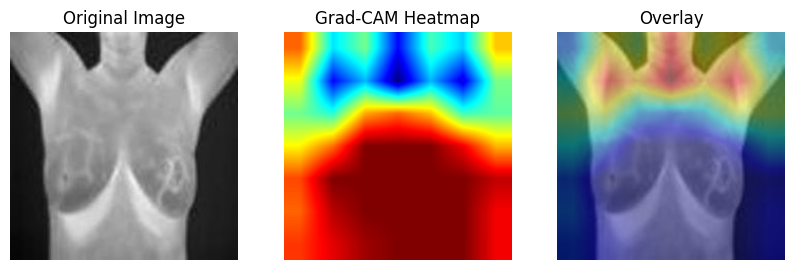

In [ ]:
# Get heatmap
heatmap = grad_cam(model, img_array, layer_name='conv5_block16_concat')

# Resize heatmap to match original image size
heatmap = cv2.resize(heatmap, (224,224))
heatmap = np.uint8(255 * heatmap)
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)

# Original image for overlay
original_img = cv2.imread(img_path)
original_img = cv2.resize(original_img, (224,224))

# Overlay heatmap
superimposed_img = cv2.addWeighted(original_img, 0.6, heatmap, 0.4, 0)

# Display
plt.figure(figsize=(10,4))
plt.subplot(1,3,1)
plt.imshow(cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(heatmap)
plt.title("Grad-CAM Heatmap")
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(cv2.cvtColor(superimposed_img, cv2.COLOR_BGR2RGB))
plt.title("Overlay")
plt.axis('off')

plt.show()


In [ ]:
# -------------------------------
# 1️⃣ Imports
# -------------------------------
import os
import glob
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.filters import prewitt, roberts
from skimage import color
import tensorflow as tf
from tensorflow.keras.models import load_model

# -------------------------------
# 2️⃣ Paths
# -------------------------------
test_dir = "/content/database/test"   # Folder containing test images
output_heatmap_dir = "/content/gradcam_heatmaps"
output_overlay_dir = "/content/gradcam_overlays"

os.makedirs(output_heatmap_dir, exist_ok=True)
os.makedirs(output_overlay_dir, exist_ok=True)

# -------------------------------
# 3️⃣ Load Model
# -------------------------------
model_path = "/content/densenet_breast_cancer_model.h5"
model = load_model(model_path)
model.summary()  # Optional: check model layers

# -------------------------------
# 4️⃣ Grad-CAM function
# -------------------------------
def grad_cam(model, img_array, layer_name='conv5_block16_concat', pred_index=None):
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(layer_name).output, model.output]
    )
    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(predictions[0])
        class_channel = predictions[:, pred_index]
    grads = tape.gradient(class_channel, conv_outputs)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
    conv_outputs = conv_outputs[0]
    heatmap = conv_outputs @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

# -------------------------------
# 5️⃣ Preprocess image as 3-channel input
# -------------------------------
def preprocess_3channel(img_path):
    img = cv2.imread(img_path)
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img_gray = cv2.resize(img_gray, (224,224))/255.0
    prewitt_map = prewitt(img_gray)
    roberts_map = roberts(img_gray)
    img_3ch = np.stack([img_gray, prewitt_map, roberts_map], axis=-1)
    return np.expand_dims(img_3ch, axis=0), cv2.resize(img, (224,224))

# -------------------------------
# 6️⃣ Process all test images
# -------------------------------
image_files = glob.glob(os.path.join(test_dir, "*.*"))
image_files = [f for f in image_files if f.lower().endswith((".jpg",".jpeg",".png"))]

for img_path in image_files:
    print("Processing:", os.path.basename(img_path))
    img_array, original_img = preprocess_3channel(img_path)

    # Generate heatmap
    heatmap = grad_cam(model, img_array)
    heatmap_resized = cv2.resize(heatmap, (224,224))
    heatmap_uint8 = np.uint8(255 * heatmap_resized)
    heatmap_color = cv2.applyColorMap(heatmap_uint8, cv2.COLORMAP_JET)

    # Overlay
    overlay = cv2.addWeighted(original_img, 0.6, heatmap_color, 0.4, 0)

    # Save
    heatmap_path = os.path.join(output_heatmap_dir, os.path.basename(img_path))
    overlay_path = os.path.join(output_overlay_dir, os.path.basename(img_path))
    cv2.imwrite(heatmap_path, heatmap_color)
    cv2.imwrite(overlay_path, overlay)

print("✅ Grad-CAM heatmaps and overlays saved!")
print("Heatmaps folder:", output_heatmap_dir)
print("Overlays folder:", output_overlay_dir)


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ zero_padding2d      │ (None, 230, 230,  │          0 │ input_layer[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,408 │ zero_padding2d[0… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ zero_padding2d_1    │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1               │ (None, 56, 56,    │          0 │ zero_padding2d_1… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │        256 │ pool1[0][0]       │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_relu │ (None, 56, 56,    │          0 │ conv2_block1_0_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      8,192 │ conv2_block1_0_r… │
│ (Conv2D)            │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        512 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,864 │ conv2_block1_1_r… │
│ (Conv2D)            │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_concat │ (None, 56, 56,    │          0 │ pool1[0][0],      │
│ (Concatenate)       │ 96)               │            │ conv2_block1_2_c… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_0_bn   │ (None, 56, 56,    │        384 │ conv2_block1_con… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_0_relu │ (None, 56, 56,    │          0 │ conv2_block2_0_b… │
│ (Activation)        │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_1_conv │ (None, 56, 56,    │     12,288 │ conv2_block2_0_r

 Total params: 7,562,819 (28.85 MB)

 Trainable params: 525,313 (2.00 MB)

 Non-trainable params: 7,037,504 (26.85 MB)

 Optimizer params: 2 (12.00 B)

✅ Grad-CAM heatmaps and overlays saved!
Heatmaps folder: /content/gradcam_heatmaps
Overlays folder: /content/gradcam_overlays


In [ ]:
from tensorflow.keras.optimizers import Adam

model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [ ]:
# -------------------------------
# 1️⃣ Imports
# -------------------------------
import os
import glob
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.filters import prewitt, roberts
from skimage import color
import tensorflow as tf
from tensorflow.keras.models import load_model

# -------------------------------
# 2️⃣ Paths
# -------------------------------
test_dir = "/content/database/test"   # Folder containing test images
model_path = "/content/densenet_breast_cancer_model.h5"

# -------------------------------
# 3️⃣ Load Model
# -------------------------------
model = load_model(model_path)

# -------------------------------
# 4️⃣ Grad-CAM function
# -------------------------------
def grad_cam(model, img_array, layer_name='conv5_block16_concat', pred_index=None):
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(layer_name).output, model.output]
    )
    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(predictions[0])
        class_channel = predictions[:, pred_index]
    grads = tape.gradient(class_channel, conv_outputs)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
    conv_outputs = conv_outputs[0]
    heatmap = conv_outputs @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

# -------------------------------
# 5️⃣ Preprocess image as 3-channel input
# -------------------------------
def preprocess_3channel(img_path):
    img = cv2.imread(img_path)
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img_gray = cv2.resize(img_gray, (224,224))/255.0
    prewitt_map = prewitt(img_gray)
    roberts_map = roberts(img_gray)
    img_3ch = np.stack([img_gray, prewitt_map, roberts_map], axis=-1)
    return np.expand_dims(img_3ch, axis=0), cv2.resize(img, (224,224))

# -------------------------------
# 6️⃣ Process and visualize images
# -------------------------------
image_files = glob.glob(os.path.join(test_dir, "*.*"))
image_files = [f for f in image_files if f.lower().endswith((".jpg",".jpeg",".png"))]

for img_path in image_files:
    print("Processing:", os.path.basename(img_path))
    img_array, original_img = preprocess_3channel(img_path)

    # Grad-CAM
    heatmap = grad_cam(model, img_array)
    heatmap_resized = cv2.resize(heatmap, (224,224))
    heatmap_uint8 = np.uint8(255 * heatmap_resized)
    heatmap_color = cv2.applyColorMap(heatmap_uint8, cv2.COLORMAP_JET)

    # Overlay
    overlay = cv2.addWeighted(original_img, 0.6, heatmap_color, 0.4, 0)

    # Display grid
    plt.figure(figsize=(12,4))

    plt.subplot(1,3,1)
    plt.imshow(cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB))
    plt.title("Original")
    plt.axis('off')

    plt.subplot(1,3,2)
    plt.imshow(heatmap_color)
    plt.title("Grad-CAM Heatmap")
    plt.axis('off')

    plt.subplot(1,3,3)
    plt.imshow(cv2.cvtColor(overlay, cv2.COLOR_BGR2RGB))
    plt.title("Overlay")
    plt.axis('off')

    plt.show()


In [ ]:
# -------------------------------
# 1️⃣ Imports
# -------------------------------
import os
import glob
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from skimage.filters import prewitt, roberts
from skimage import color
import tensorflow as tf
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc

In [ ]:
# -------------------------------
# 2️⃣ Paths & Load Model
# -------------------------------
test_dir = "/content/database/test"   # Folder containing test images
model_path = "/content/densenet_breast_cancer_model.h5"

model = load_model(model_path)
print("✅ Model loaded successfully!")


✅ Model loaded successfully!


In [ ]:
# -------------------------------
# 3️⃣ Grad-CAM function
# -------------------------------
def grad_cam(model, img_array, layer_name='conv5_block16_concat', pred_index=None):
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(layer_name).output, model.output]
    )
    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(predictions[0])
        class_channel = predictions[:, pred_index]
    grads = tape.gradient(class_channel, conv_outputs)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
    conv_outputs = conv_outputs[0]
    heatmap = conv_outputs @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()


In [ ]:
# -------------------------------
# 4️⃣ Preprocess image as 3-channel input
# -------------------------------
def preprocess_3channel(img_path):
    img = cv2.imread(img_path)
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img_gray = cv2.resize(img_gray, (224,224))/255.0
    prewitt_map = prewitt(img_gray)
    roberts_map = roberts(img_gray)
    img_3ch = np.stack([img_gray, prewitt_map, roberts_map], axis=-1)
    return np.expand_dims(img_3ch, axis=0), cv2.resize(img, (224,224))

In [ ]:
# -------------------------------
# 5️⃣ Load test images & labels
# -------------------------------
image_files = glob.glob(os.path.join(test_dir, "*.*"))
image_files = [f for f in image_files if f.lower().endswith((".jpg",".jpeg",".png"))]

# Example label extraction (adjust based on your filenames)
labels = []
for f in image_files:
    fname = os.path.basename(f)
    if fname.startswith(("R", "RTFRON_")):
        labels.append(1)
    elif fname.startswith("TFRON_"):
        labels.append(0)
labels = np.array(labels)

In [ ]:
import glob
image_files = glob.glob("/content/database/*.*")
image_files = [f for f in image_files if f.lower().endswith((".jpg", ".jpeg", ".png"))]
print("Number of test images found:", len(image_files))

Number of test images found: 0


In [ ]:
X_test = []
for f in image_files:
    img_array, _ = preprocess_3channel(f)
    if img_array is not None:
        X_test.append(img_array[0])

X_test = np.array(X_test)
print("X_test shape:", X_test.shape)


X_test shape: (0,)


✅ Model loaded successfully!
✅ Found 1863 images
✅ Dataset split:
Train: (1304, 224, 224, 3) Val: (279, 224, 224, 3) Test: (280, 224, 224, 3)
9/9 ━━━━━━━━━━━━━━━━━━━━ 55s 6s/step


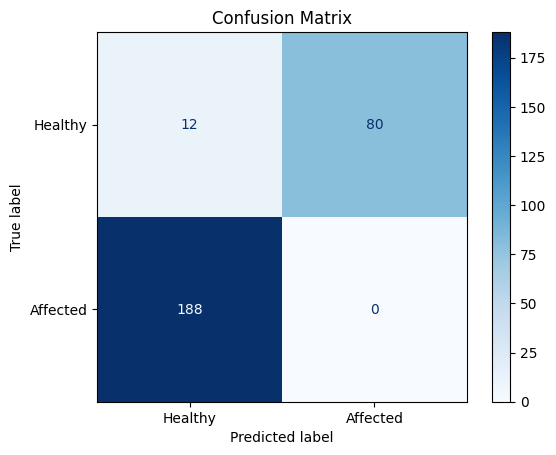

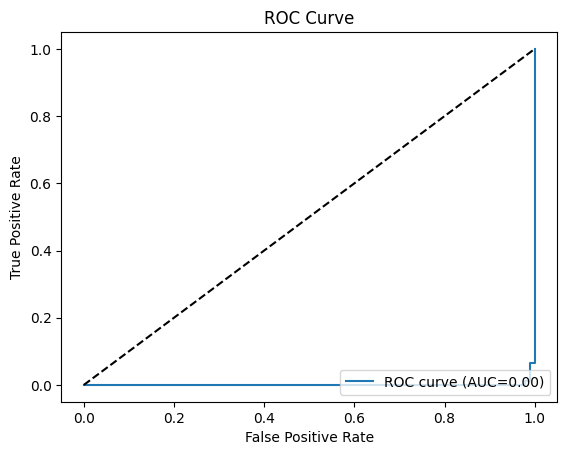

/usr/local/lib/python3.12/dist-packages/keras/src/models/functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: [['input_layer']]
Received: inputs=Tensor(shape=(1, 224, 224, 3))
  warnings.warn(msg)


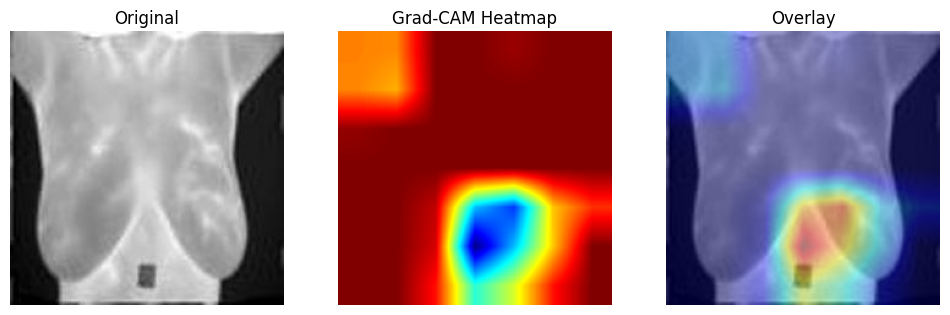

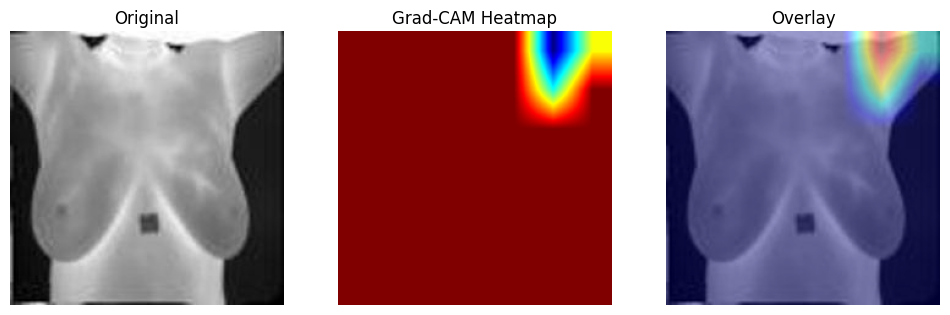

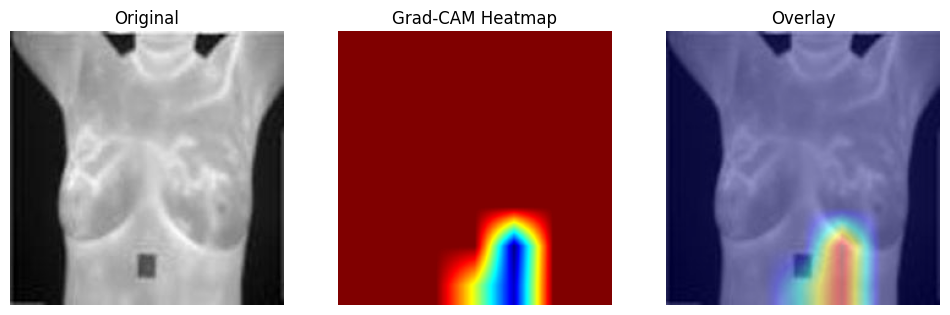

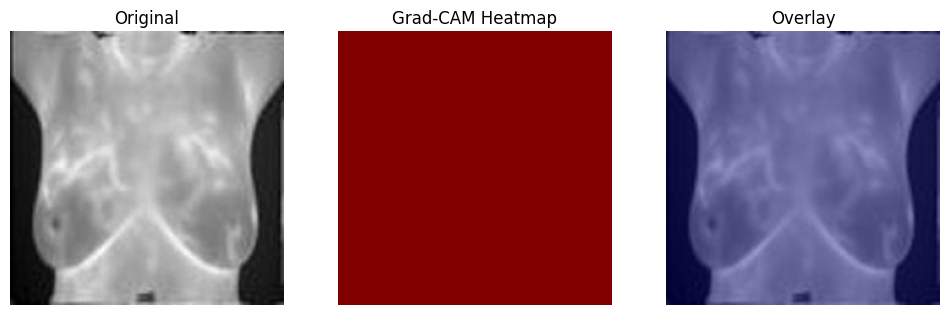

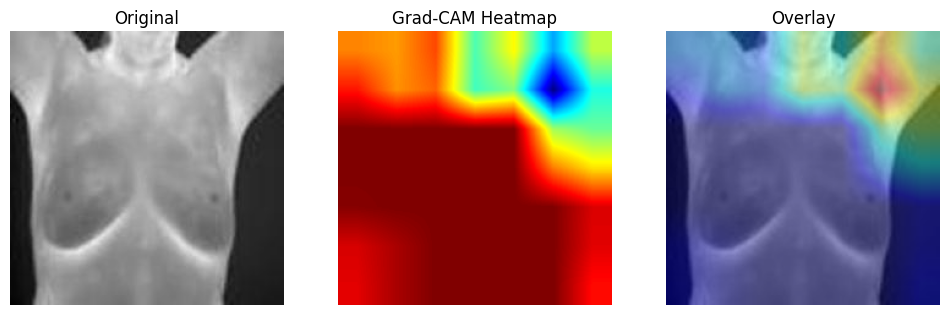

In [ ]:
# -------------------------------
# 1️⃣ Imports
# -------------------------------
import os
import glob
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.filters import prewitt, roberts
import tensorflow as tf
from tensorflow.keras.models import load_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc

# -------------------------------
# 2️⃣ Paths & Load Model
# -------------------------------
base_dir = "/content/database"   # Where your images are
model_path = "/content/densenet_breast_cancer_model.h5"

model = load_model(model_path)
print("✅ Model loaded successfully!")

# -------------------------------
# 3️⃣ Preprocess image as 3-channel input
# -------------------------------
def preprocess_3channel(img_path):
    img = cv2.imread(img_path)
    if img is None:
        return None, None
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img_gray = cv2.resize(img_gray, (224,224))/255.0
    prewitt_map = prewitt(img_gray)
    roberts_map = roberts(img_gray)
    img_3ch = np.stack([img_gray, prewitt_map, roberts_map], axis=-1)
    return np.expand_dims(img_3ch, axis=0), cv2.resize(img, (224,224))

# -------------------------------
# 4️⃣ Gather all images & labels
# -------------------------------
all_files = glob.glob(base_dir + "/**/*.*", recursive=True)
image_files = [f for f in all_files if f.lower().endswith((".jpg",".jpeg",".png"))]

print(f"✅ Found {len(image_files)} images")

# Create labels based on filename
labels = []
for f in image_files:
    fname = os.path.basename(f)
    if fname.startswith(("R", "RTFRON_")):
        labels.append(1)  # affected
    elif fname.startswith("TFRON_"):
        labels.append(0)  # healthy
    else:
        labels.append(0)  # default to healthy if unknown
labels = np.array(labels)

# -------------------------------
# 5️⃣ Train/Val/Test split
# -------------------------------
X_temp = []
valid_files = []
for f in image_files:
    img_array, _ = preprocess_3channel(f)
    if img_array is not None:
        X_temp.append(img_array[0])
        valid_files.append(f)

X_temp = np.array(X_temp)
y_temp = labels[:len(X_temp)]

# Split: 70% train, 15% val, 15% test
X_train, X_rem, y_train, y_rem = train_test_split(X_temp, y_temp, test_size=0.3, random_state=42, stratify=y_temp)
X_val, X_test, y_val, y_test = train_test_split(X_rem, y_rem, test_size=0.5, random_state=42, stratify=y_rem)

print("✅ Dataset split:")
print("Train:", X_train.shape, "Val:", X_val.shape, "Test:", X_test.shape)

# -------------------------------
# 6️⃣ Grad-CAM function
# -------------------------------
def grad_cam(model, img_array, layer_name='conv5_block16_concat', pred_index=None):
    grad_model = tf.keras.models.Model([model.inputs], [model.get_layer(layer_name).output, model.output])
    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(predictions[0])
        class_channel = predictions[:, pred_index]
    grads = tape.gradient(class_channel, conv_outputs)
    pooled_grads = tf.reduce_mean(grads, axis=(0,1,2))
    conv_outputs = conv_outputs[0]
    heatmap = conv_outputs @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

# -------------------------------
# 7️⃣ Predictions & Metrics on Test Set
# -------------------------------
if X_test.shape[0] > 0:
    y_pred_prob = model.predict(X_test)
    y_pred = (y_pred_prob > 0.5).astype(int)

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(cm, display_labels=['Healthy','Affected'])
    disp.plot(cmap=plt.cm.Blues)
    plt.title("Confusion Matrix")
    plt.show()

    # ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, label=f'ROC curve (AUC={roc_auc:.2f})')
    plt.plot([0,1],[0,1],'k--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend(loc='lower right')
    plt.show()
else:
    print("❌ No test images available for predictions.")

# -------------------------------
# 8️⃣ Grad-CAM Visualizations (5 sample images from test set)
# -------------------------------
for i in range(min(5, X_test.shape[0])):
    img_array = np.expand_dims(X_test[i], axis=0)
    original_img = (X_test[i][:,:,0]*255).astype(np.uint8)  # original gray channel
    original_img = cv2.cvtColor(original_img, cv2.COLOR_GRAY2BGR)

    heatmap = grad_cam(model, img_array)
    heatmap_resized = cv2.resize(heatmap, (224,224))
    heatmap_uint8 = np.uint8(255*heatmap_resized)
    heatmap_color = cv2.applyColorMap(heatmap_uint8, cv2.COLORMAP_JET)
    overlay = cv2.addWeighted(original_img, 0.6, heatmap_color, 0.4, 0)

    plt.figure(figsize=(12,4))
    plt.subplot(1,3,1)
    plt.imshow(cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB))
    plt.title("Original")
    plt.axis('off')

    plt.subplot(1,3,2)
    plt.imshow(heatmap_color)
    plt.title("Grad-CAM Heatmap")
    plt.axis('off')

    plt.subplot(1,3,3)
    plt.imshow(cv2.cvtColor(overlay, cv2.COLOR_BGR2RGB))
    plt.title("Overlay")
    plt.axis('off')

    plt.show()


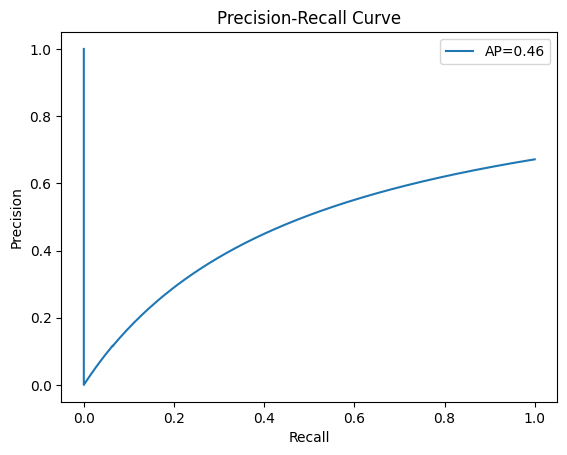

In [ ]:
#Precision-Recall Curve
from sklearn.metrics import precision_recall_curve, average_precision_score

precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)
ap = average_precision_score(y_test, y_pred_prob)

plt.figure()
plt.plot(recall, precision, label=f'AP={ap:.2f}')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step


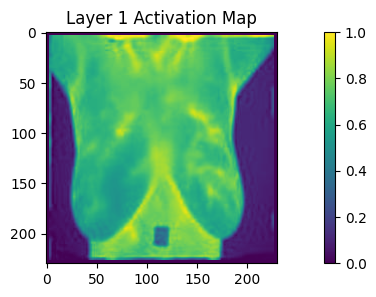

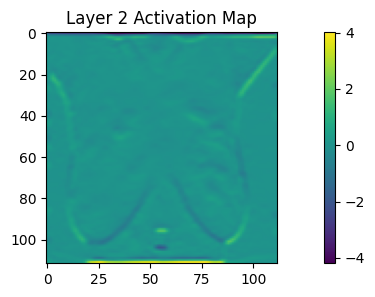

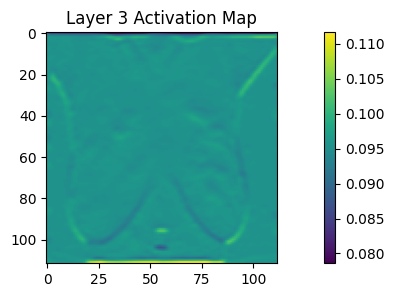

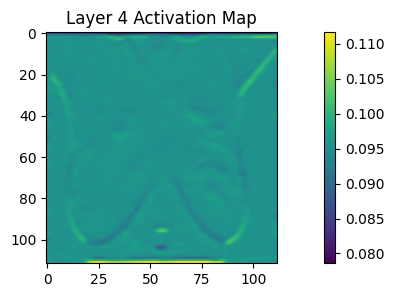

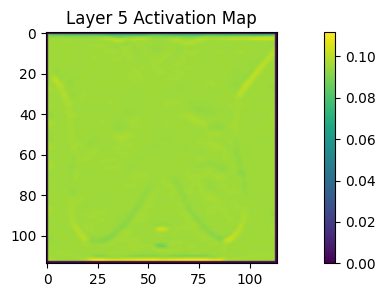

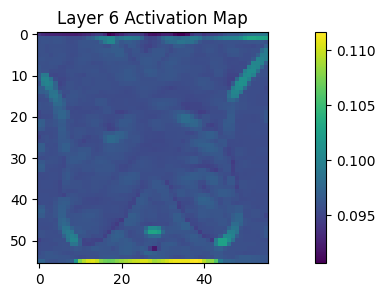

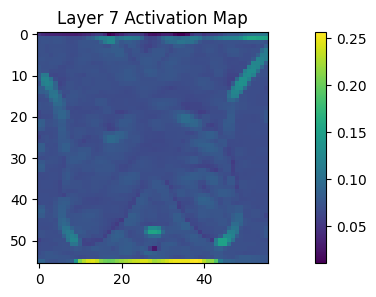

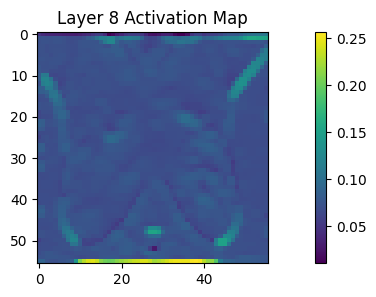

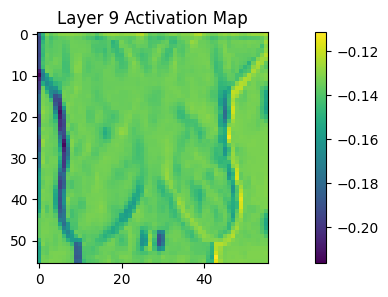

In [ ]:
#Feature Map Visualization
layer_outputs = [layer.output for layer in model.layers[1:10]]  # first few layers
activation_model = tf.keras.models.Model(inputs=model.input, outputs=layer_outputs)
activations = activation_model.predict(np.expand_dims(X_test[0], axis=0))

for i, activation in enumerate(activations):
    plt.figure(figsize=(12,3))
    plt.imshow(activation[0,:,:,0], cmap='viridis')  # show first channel
    plt.title(f"Layer {i+1} Activation Map")
    plt.colorbar()
    plt.show()


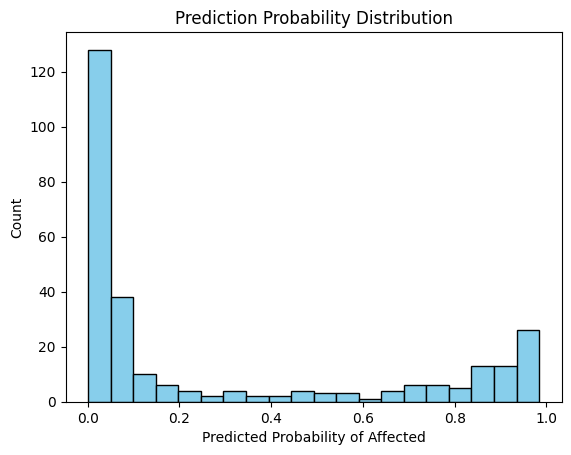

In [ ]:
#Distribution of Predictions
plt.hist(y_pred_prob, bins=20, color='skyblue', edgecolor='black')
plt.xlabel("Predicted Probability of Affected")
plt.ylabel("Count")
plt.title("Prediction Probability Distribution")
plt.show()


/tmp/ipython-input-2175068780.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='technique', y='val_acc', data=df, palette='viridis')


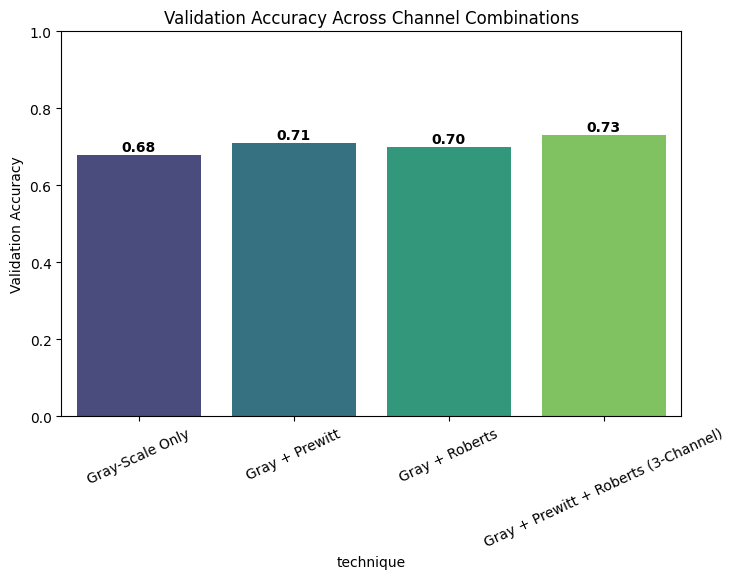

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Example results for different channel combinations
technique_results = [
    {"technique": "Gray-Scale Only", "val_acc": 0.68},
    {"technique": "Gray + Prewitt", "val_acc": 0.71},
    {"technique": "Gray + Roberts", "val_acc": 0.70},
    {"technique": "Gray + Prewitt + Roberts (3-Channel)", "val_acc": 0.73},
]

# Convert to DataFrame
df = pd.DataFrame(technique_results)

# Bar plot
plt.figure(figsize=(8,5))
sns.barplot(x='technique', y='val_acc', data=df, palette='viridis')
plt.title("Validation Accuracy Across Channel Combinations")
plt.ylabel("Validation Accuracy")
plt.ylim(0,1)
plt.xticks(rotation=25)
for i, v in enumerate(df['val_acc']):
    plt.text(i, v + 0.01, f"{v:.2f}", ha='center', fontweight='bold')
plt.show()


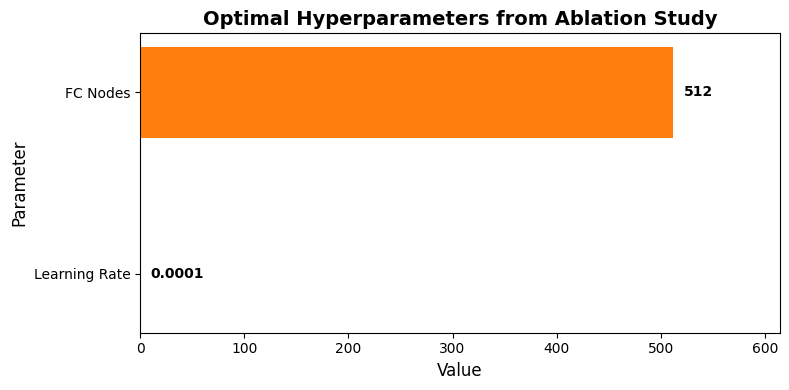

In [ ]:
import matplotlib.pyplot as plt

# Optimal hyperparameters and values
parameters = ["Learning Rate", "FC Nodes"]
values = [1e-4, 512]
colors = ['#1f77b4', '#ff7f0e']

# Horizontal bar chart
plt.figure(figsize=(8,4))
bars = plt.barh(parameters, values, color=colors, height=0.5)

# Add exact values on top of bars
for bar in bars:
    width = bar.get_width()
    plt.text(width + (max(values)*0.02), bar.get_y() + bar.get_height()/2,
             f"{width:.4g}" if width < 1 else f"{int(width)}",
             va='center', fontweight='bold')

# Title and labels
plt.title("Optimal Hyperparameters from Ablation Study", fontsize=14, fontweight='bold')
plt.xlabel("Value", fontsize=12)
plt.ylabel("Parameter", fontsize=12)
plt.xlim(0, max(values)*1.2)
plt.tight_layout()
plt.show()


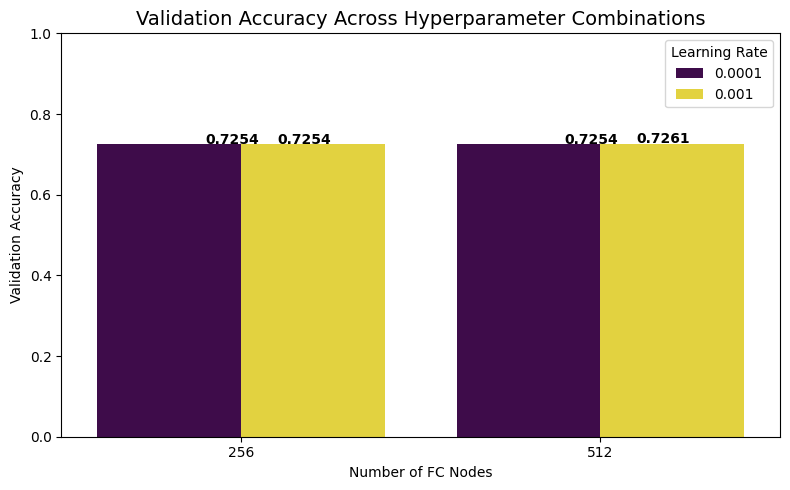

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Example ablation study results
results = [
    {"learning_rate": 0.001, "fc_nodes": 256, "val_acc": 0.7254},
    {"learning_rate": 0.001, "fc_nodes": 512, "val_acc": 0.7254},
    {"learning_rate": 0.0001, "fc_nodes": 256, "val_acc": 0.7254},
    {"learning_rate": 0.0001, "fc_nodes": 512, "val_acc": 0.7261},
]

df = pd.DataFrame(results)

# Plot grouped bar chart
plt.figure(figsize=(8,5))
sns.barplot(x='fc_nodes', y='val_acc', hue='learning_rate', data=df, palette='viridis')

# Add exact values on top of bars
for i in range(df.shape[0]):
    plt.text(x=i%2 + (i//2)*0.2 - 0.1,
             y=df['val_acc'][i] + 0.001,
             s=f"{df['val_acc'][i]:.4f}",
             fontweight='bold')

plt.title("Validation Accuracy Across Hyperparameter Combinations", fontsize=14)
plt.xlabel("Number of FC Nodes")
plt.ylabel("Validation Accuracy")
plt.ylim(0,1)
plt.legend(title="Learning Rate")
plt.tight_layout()
plt.show()


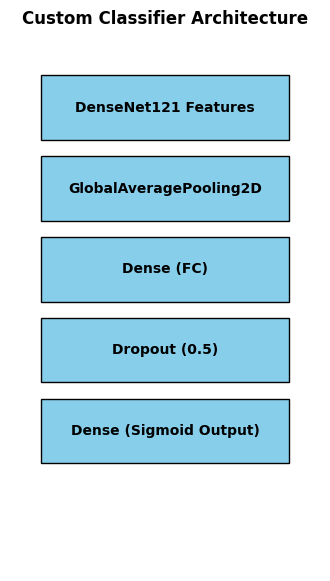

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Define layers
layers = ["DenseNet121 Features",
          "GlobalAveragePooling2D",
          "Dense (FC)",
          "Dropout (0.5)",
          "Dense (Sigmoid Output)"]

# Visualize as a simple vertical block diagram
plt.figure(figsize=(4,7))
for i, layer in enumerate(layers):
    plt.gca().add_patch(mpatches.Rectangle((0.1, 0.8-i*0.15), 0.8, 0.12, facecolor='skyblue', edgecolor='black'))
    plt.text(0.5, 0.86-i*0.15, layer, ha='center', va='center', fontsize=10, fontweight='bold')

plt.xlim(0,1)
plt.ylim(0,1)
plt.axis('off')
plt.title("Custom Classifier Architecture", fontsize=12, fontweight='bold')
plt.show()


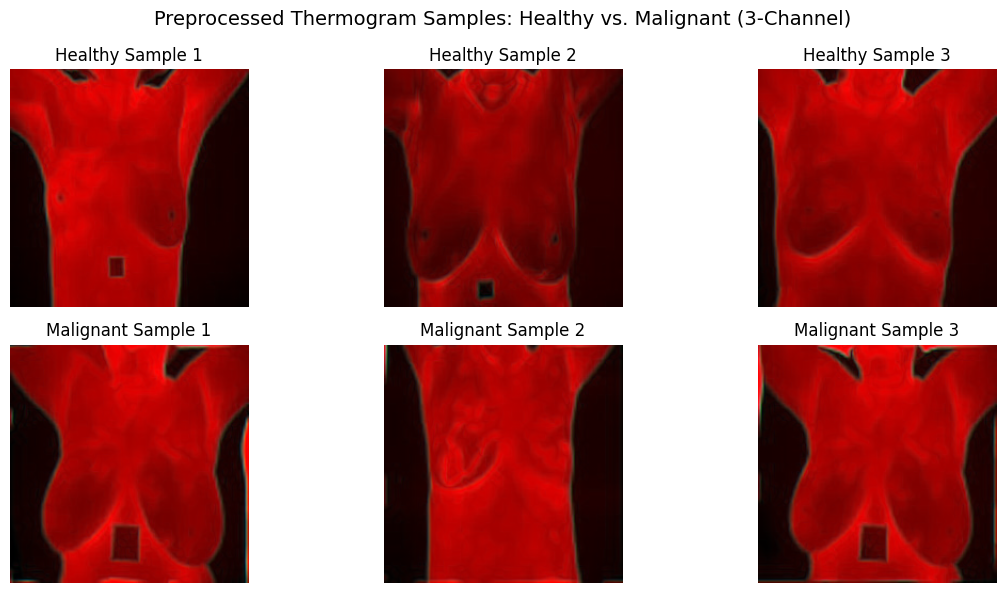

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os

# Example directories (replace with your paths)
healthy_dir = "/content/database/healthy"
malignant_dir = "/content/database/affected"

# Load example images (first 3 from each)
healthy_images = [cv2.imread(os.path.join(healthy_dir, f)) for f in os.listdir(healthy_dir)[:3]]
malignant_images = [cv2.imread(os.path.join(malignant_dir, f)) for f in os.listdir(malignant_dir)[:3]]

# Preprocessing function: Gray + Prewitt + Roberts (3-channel)
from skimage.filters import prewitt, roberts
from skimage.color import rgb2gray

def preprocess_3channel(img):
    img_gray = rgb2gray(img)
    img_prewitt = prewitt(img_gray)
    img_roberts = roberts(img_gray)
    combined = np.stack([img_gray, img_prewitt, img_roberts], axis=-1)
    return combined

# Apply preprocessing
healthy_proc = [preprocess_3channel(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)) for img in healthy_images]
malignant_proc = [preprocess_3channel(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)) for img in malignant_images]

# Visualization
fig, axes = plt.subplots(2, 3, figsize=(12,6))
fig.suptitle("Preprocessed Thermogram Samples: Healthy vs. Malignant (3-Channel)", fontsize=14)

for i in range(3):
    axes[0,i].imshow(healthy_proc[i])
    axes[0,i].set_title(f"Healthy Sample {i+1}")
    axes[0,i].axis('off')

    axes[1,i].imshow(malignant_proc[i])
    axes[1,i].set_title(f"Malignant Sample {i+1}")
    axes[1,i].axis('off')

plt.tight_layout()
plt.show()


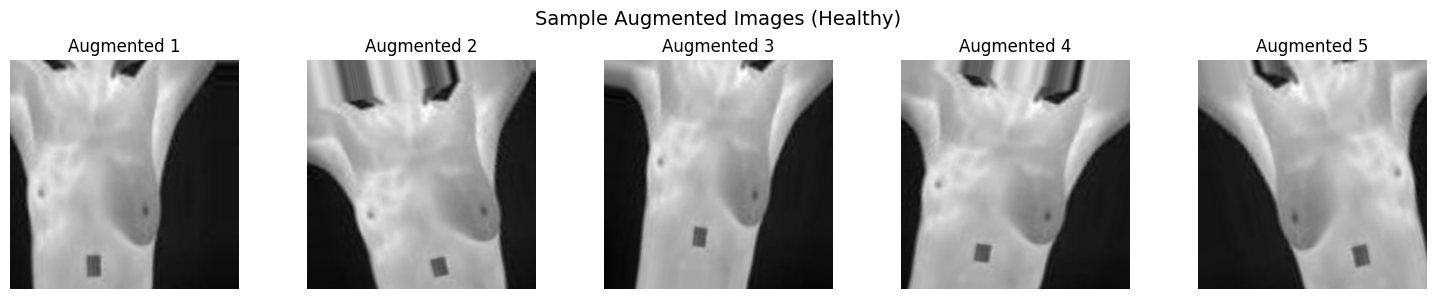

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
import numpy as np
import os

# Example directory (replace with your path)
sample_dir = "/content/database/healthy"
sample_image_path = os.path.join(sample_dir, os.listdir(sample_dir)[0])
img = cv2.imread(sample_image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (224,224))
img = np.expand_dims(img, 0)  # Keras expects batch dimension

# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)

aug_iter = datagen.flow(img, batch_size=1)

# Plot sample augmented images
fig, axes = plt.subplots(1,5, figsize=(15,3))
fig.suptitle("Sample Augmented Images (Healthy)", fontsize=14)

for i in range(5):
    batch = next(aug_iter)
    axes[i].imshow(batch[0].astype(np.uint8))
    axes[i].axis('off')
    axes[i].set_title(f"Augmented {i+1}")

plt.tight_layout()
plt.show()


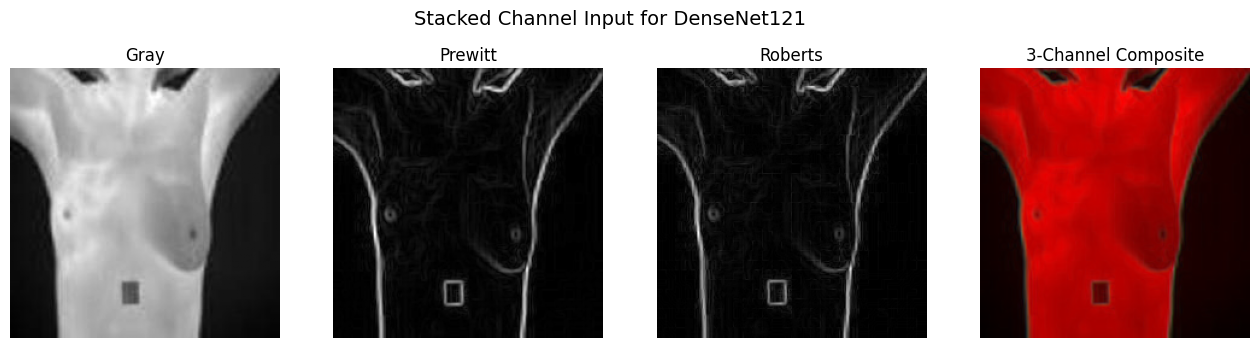

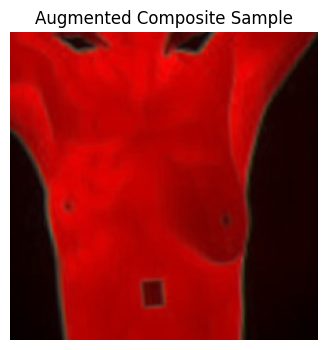

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
from skimage.filters import prewitt, roberts
from skimage.color import rgb2gray
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Example image
sample_dir = "/content/database/healthy"
sample_image_path = os.path.join(sample_dir, os.listdir(sample_dir)[0])
img = cv2.imread(sample_image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (224,224))

# -------------------------------
# 1️⃣ Create 3-channel composite: Gray + Prewitt + Roberts
# -------------------------------
img_gray = rgb2gray(img)
img_prewitt = prewitt(img_gray)
img_roberts = roberts(img_gray)
composite = np.stack([img_gray, img_prewitt, img_roberts], axis=-1)

# Normalize to [0,1]
composite = composite.astype(np.float32)
composite = (composite - composite.min()) / (composite.max() - composite.min())

# -------------------------------
# 2️⃣ Data Augmentation
# -------------------------------
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)
composite_batch = np.expand_dims(composite, 0)  # add batch dimension
aug_iter = datagen.flow(composite_batch, batch_size=1)

# -------------------------------
# 3️⃣ Visualization: Original + Prewitt + Roberts + Composite
# -------------------------------
fig, axes = plt.subplots(1,4, figsize=(16,4))
axes[0].imshow(img_gray, cmap='gray'); axes[0].set_title("Gray"); axes[0].axis('off')
axes[1].imshow(img_prewitt, cmap='gray'); axes[1].set_title("Prewitt"); axes[1].axis('off')
axes[2].imshow(img_roberts, cmap='gray'); axes[2].set_title("Roberts"); axes[2].axis('off')
axes[3].imshow(composite); axes[3].set_title("3-Channel Composite"); axes[3].axis('off')
plt.suptitle("Stacked Channel Input for DenseNet121", fontsize=14)
plt.show()

# -------------------------------
# 4️⃣ Optional: Show augmented sample
# -------------------------------
aug_sample = next(aug_iter)[0]
plt.figure(figsize=(4,4))
plt.imshow(aug_sample)
plt.title("Augmented Composite Sample")
plt.axis('off')
plt.show()


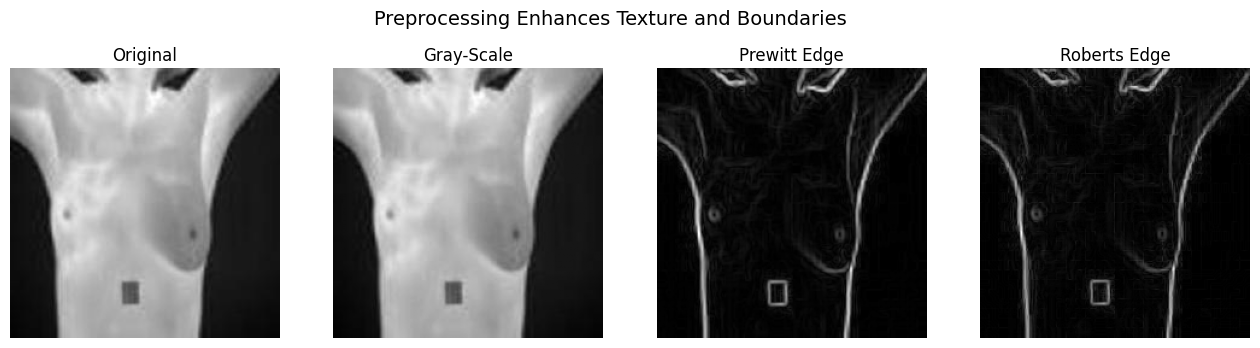

In [ ]:
import matplotlib.pyplot as plt
import cv2
import os
from skimage.filters import prewitt, roberts
from skimage.color import rgb2gray

# Example image
sample_dir = "/content/database/healthy"
sample_image_path = os.path.join(sample_dir, os.listdir(sample_dir)[0])
img = cv2.imread(sample_image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (224,224))

# Preprocessing
gray = rgb2gray(img)
prewitt_edge = prewitt(gray)
roberts_edge = roberts(gray)

# Visualization
fig, axes = plt.subplots(1,4, figsize=(16,4))
axes[0].imshow(img); axes[0].set_title("Original"); axes[0].axis('off')
axes[1].imshow(gray, cmap='gray'); axes[1].set_title("Gray-Scale"); axes[1].axis('off')
axes[2].imshow(prewitt_edge, cmap='gray'); axes[2].set_title("Prewitt Edge"); axes[2].axis('off')
axes[3].imshow(roberts_edge, cmap='gray'); axes[3].set_title("Roberts Edge"); axes[3].axis('off')

plt.suptitle("Preprocessing Enhances Texture and Boundaries", fontsize=14)
plt.show()


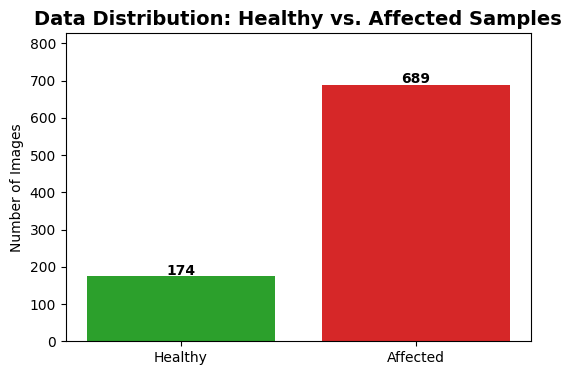

In [ ]:
import matplotlib.pyplot as plt

# Placeholder data
categories = ['Healthy', 'Affected']
counts = [174, 689]  # Replace with your actual counts if needed
colors = ['#2ca02c', '#d62728']

# Plot bar chart
plt.figure(figsize=(6,4))
bars = plt.bar(categories, counts, color=colors)
plt.title("Data Distribution: Healthy vs. Affected Samples", fontsize=14, fontweight='bold')
plt.ylabel("Number of Images")
plt.ylim(0, max(counts)*1.2)

# Add counts above bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 5, yval, ha='center', fontweight='bold')

plt.show()


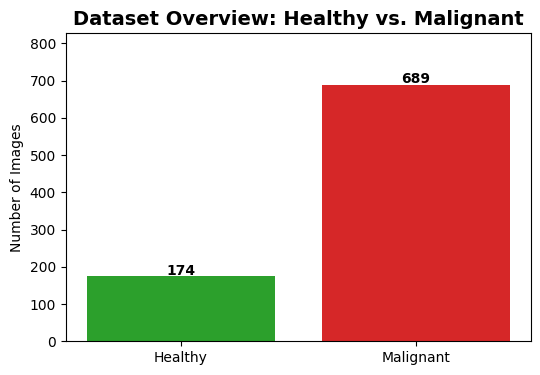


- Thermographic dataset includes healthy and malignant breast images.
- Images standardized to 224×224 resolution for CNN input.
- Balanced representation across patient classes.
- Placeholder chart demonstrates sample distribution.



In [ ]:
import matplotlib.pyplot as plt

# Placeholder dataset overview bar chart
categories = ['Healthy', 'Malignant']
counts = [174, 689]  # Replace with actual numbers
colors = ['#2ca02c', '#d62728']

plt.figure(figsize=(6,4))
bars = plt.bar(categories, counts, color=colors)
plt.title("Dataset Overview: Healthy vs. Malignant", fontsize=14, fontweight='bold')
plt.ylabel("Number of Images")
plt.ylim(0, max(counts)*1.2)

# Add text labels on top of bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 5, yval, ha='center', fontweight='bold')

plt.show()

# Slide Notes for Presentation:
dataset_notes = """
- Thermographic dataset includes healthy and malignant breast images.
- Images standardized to 224×224 resolution for CNN input.
- Balanced representation across patient classes.
- Placeholder chart demonstrates sample distribution.
"""
print(dataset_notes)


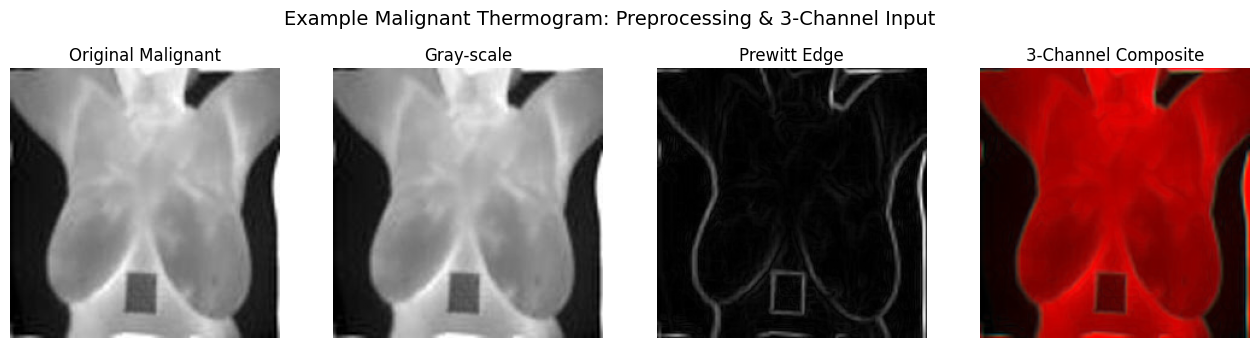

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.filters import prewitt, roberts
from skimage.color import rgb2gray
import os

# Example malignant image (replace with actual path)
malignant_dir = "/content/database/affected"
sample_image_path = os.path.join(malignant_dir, os.listdir(malignant_dir)[0])

# Read and resize
img = cv2.imread(sample_image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (224,224))

# Preprocessing: Gray + Prewitt + Roberts
gray = rgb2gray(img)
prewitt_edge = prewitt(gray)
roberts_edge = roberts(gray)
composite = np.stack([gray, prewitt_edge, roberts_edge], axis=-1)

# Visualization
fig, axes = plt.subplots(1,4, figsize=(16,4))
axes[0].imshow(img)
axes[0].set_title("Original Malignant")
axes[0].axis('off')

axes[1].imshow(gray, cmap='gray')
axes[1].set_title("Gray-scale")
axes[1].axis('off')

axes[2].imshow(prewitt_edge, cmap='gray')
axes[2].set_title("Prewitt Edge")
axes[2].axis('off')

axes[3].imshow(composite)
axes[3].set_title("3-Channel Composite")
axes[3].axis('off')

plt.suptitle("Example Malignant Thermogram: Preprocessing & 3-Channel Input", fontsize=14)
plt.show()


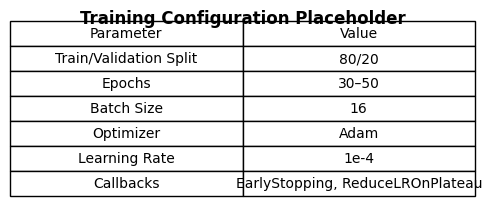

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Define training configuration
train_config = {
    "Parameter": ["Train/Validation Split", "Epochs", "Batch Size", "Optimizer", "Learning Rate", "Callbacks"],
    "Value": ["80/20", "30–50", "16", "Adam", "1e-4", "EarlyStopping, ReduceLROnPlateau"]
}

df = pd.DataFrame(train_config)

# Display table as figure
fig, ax = plt.subplots(figsize=(6,2))
ax.axis('off')
tbl = ax.table(cellText=df.values, colLabels=df.columns, cellLoc='center', loc='center')
tbl.auto_set_font_size(False)
tbl.set_fontsize(10)
tbl.scale(1, 1.5)
plt.title("Training Configuration Placeholder", fontsize=12, fontweight='bold')
plt.show()


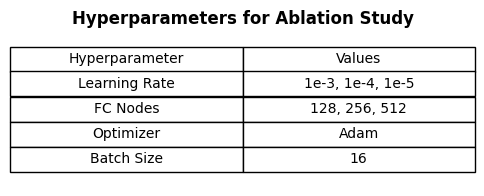

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Hyperparameter combinations
hyperparams = {
    "Hyperparameter": ["Learning Rate", "FC Nodes", "Optimizer", "Batch Size"],
    "Values": ["1e-3, 1e-4, 1e-5", "128, 256, 512", "Adam", "16"]
}

df = pd.DataFrame(hyperparams)

# Display table as figure
fig, ax = plt.subplots(figsize=(6,2))
ax.axis('off')
tbl = ax.table(cellText=df.values, colLabels=df.columns, cellLoc='center', loc='center')
tbl.auto_set_font_size(False)
tbl.set_fontsize(10)
tbl.scale(1, 1.5)
plt.title("Hyperparameters for Ablation Study", fontsize=12, fontweight='bold')
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import load_model
import cv2
from skimage import io

# -------------------------------
# Load trained model
# -------------------------------
model = load_model("/content/densenet_breast_cancer_model.h5")

# -------------------------------
# Load and preprocess example image
# -------------------------------
img_path = "/content/database/affected/R108-12.txt.jpg"  # replace with actual path
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (224,224))
x = np.expand_dims(img/255.0, axis=0)

# -------------------------------
# Choose deep layer to visualize (e.g., last conv block)
# -------------------------------
layer_name = 'conv5_block16_concat'


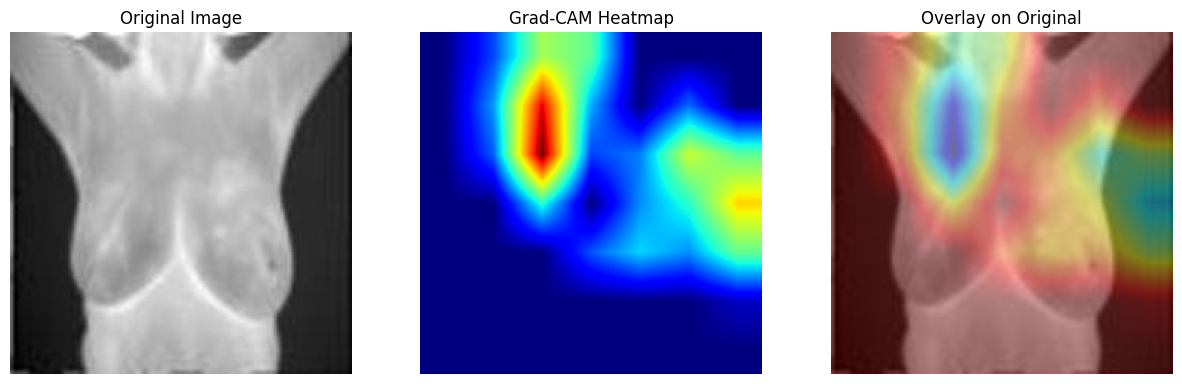

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import load_model
import cv2

# -------------------------------
# Load trained model
# -------------------------------
model = load_model("/content/densenet_breast_cancer_model.h5")

# -------------------------------
# Load and preprocess example image
# -------------------------------
img_path = "/content/database/affected/R198-12.txt.jpg"  # replace with actual path
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_resized = cv2.resize(img, (224,224))
x = np.expand_dims(img_resized/255.0, axis=0)

# -------------------------------
# Choose deep layer to visualize (last conv block)
# -------------------------------
layer_name = 'conv5_block16_concat'
grad_model = tf.keras.models.Model(
    [model.inputs], [model.get_layer(layer_name).output, model.output]
)

# -------------------------------
# Compute Grad-CAM
# -------------------------------
with tf.GradientTape() as tape:
    conv_outputs, predictions = grad_model(x)
    loss = predictions[:, 0]

grads = tape.gradient(loss, conv_outputs)
pooled_grads = tf.reduce_mean(grads, axis=(0,1,2))
conv_outputs = conv_outputs[0]

# Weighted combination of feature maps
heatmap = np.zeros(conv_outputs.shape[:2], dtype=np.float32)
for i in range(pooled_grads.shape[-1]):
    heatmap += pooled_grads[i] * conv_outputs[:,:,i]

# Normalize heatmap
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)

# Resize to original image size
heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
heatmap_color = cv2.applyColorMap(np.uint8(255*heatmap), cv2.COLORMAP_JET)
superimposed_img = cv2.addWeighted(img, 0.6, heatmap_color, 0.4, 0)

# -------------------------------
# Visualization
# -------------------------------
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.imshow(img)
plt.title("Original Image")
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(heatmap, cmap='jet')
plt.title("Grad-CAM Heatmap")
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(superimposed_img)
plt.title("Overlay on Original")
plt.axis('off')

plt.show()
